## SyriaTel Customer Churn Prediction

## Business Understanding
This project aims to help SyriaTel identify customers at risk of leaving so the company can take proactive steps to retain them. By accurately predicting customer churn, SyriaTel can take proactive measures to retain these customers, thereby reducing revenue loss and increasing customer lifetime value.The management and marketing teams can implement targeted strategies like personalized offers and improved service, reducing customer loss and boosting profitability.



## Problem Statement

SyriaTel has been experiencing a high churn rate leading to losses for the company.This project aims to create a predictive model that accurately identifies customers at risk of churning for SyriaTel, a telecommunications company.

By proactively identifying customers who may discontinue their services, the objective is to decrease customer attrition and retain a higher number of customers. Ultimately, the project seeks to support SyriaTel in reducing financial losses caused by customer churn, improving overall customer retention rates, and optimizing business strategies to enhance profitability.

## Objectives
The primary business objectives of this project for SyriaTel are to reduce customer churn, improve customer retention rates, and enhance overall customer satisfaction.

We will focus on the following questions to achieve our objectives;


1. Identify Key Predictors of Customer Churn: Determine which
features most significantly influence customer churn at SyriaTel.

2. Provide Actionable Insights for Customer Retention by translating the findings from the predictive models into actionable recommendations for the management and marketing teams at SyriaTel.

3. Build and compare different machine learning models that is, logistic regression and decision trees to predict customer churn with high accuracy.





## Data understanding


In [19]:
#Import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

# Loading data

In [20]:
#Importing dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv('customer_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [21]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data cleaning

In [23]:
#Check for missing data
df.isnull().sum()

,0
state,0
account length,0
area code,0
phone number,0
international plan,0
voice mail plan,0
number vmail messages,0
total day minutes,0
total day calls,0
total day charge,0


There is no missing data in the dataset

## Handling duplicates

In [24]:
#Checking for duplicates
df.duplicated().sum()

0

Appears like there are no duplicates in the data set|

## Exploratory Data Analysis

In [25]:
# Convert the "churn" column to integer type
df["churn"] = df["churn"].astype(int)

We split the data into categorical and numerical data

In [26]:
# seperating categorical from numerical data
categorical_df = df.select_dtypes("object")
categorical_df = categorical_df.drop("phone number", axis=1)
categorical_df.head()

,state,international plan,voice mail plan
0,KS,no,yes
1,OH,no,yes
2,NJ,no,no
3,OH,yes,no
4,OK,yes,no


In [27]:
# numerical data
numeric_df =  df.select_dtypes("number")
numeric_df.head()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Univariate Analysis

Let us check the distribution of the target variable

Checking the target variable's count helps us understand the class distribution, revealing the number of customers who churned versus those who stayed.

### BIvariate analysis

churn
0    2850
1     483
Name: count, dtype: int64


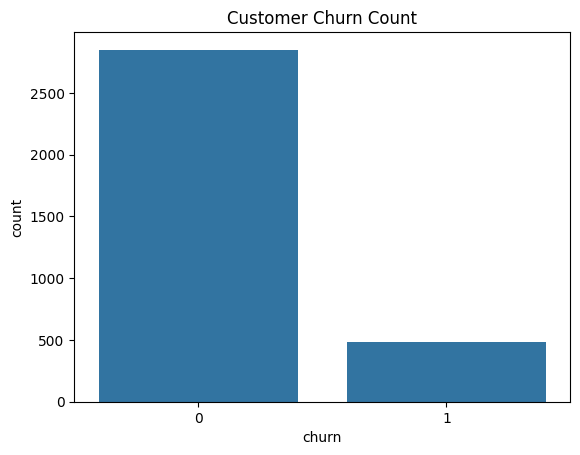

In [28]:
# Count of churn (target variable)

print(df['churn'].value_counts())

# Visualize the churn distribution using a count plot
sns.countplot(data=df, x='churn')
plt.title('Customer Churn Count')
plt.show()

There is an inbalance between the classes

## Histograms and KDE of Numerical Features

To identify the shape, skewness, and spread of the data we plotted histograms combined with Kernel Density Estimation (KDE).

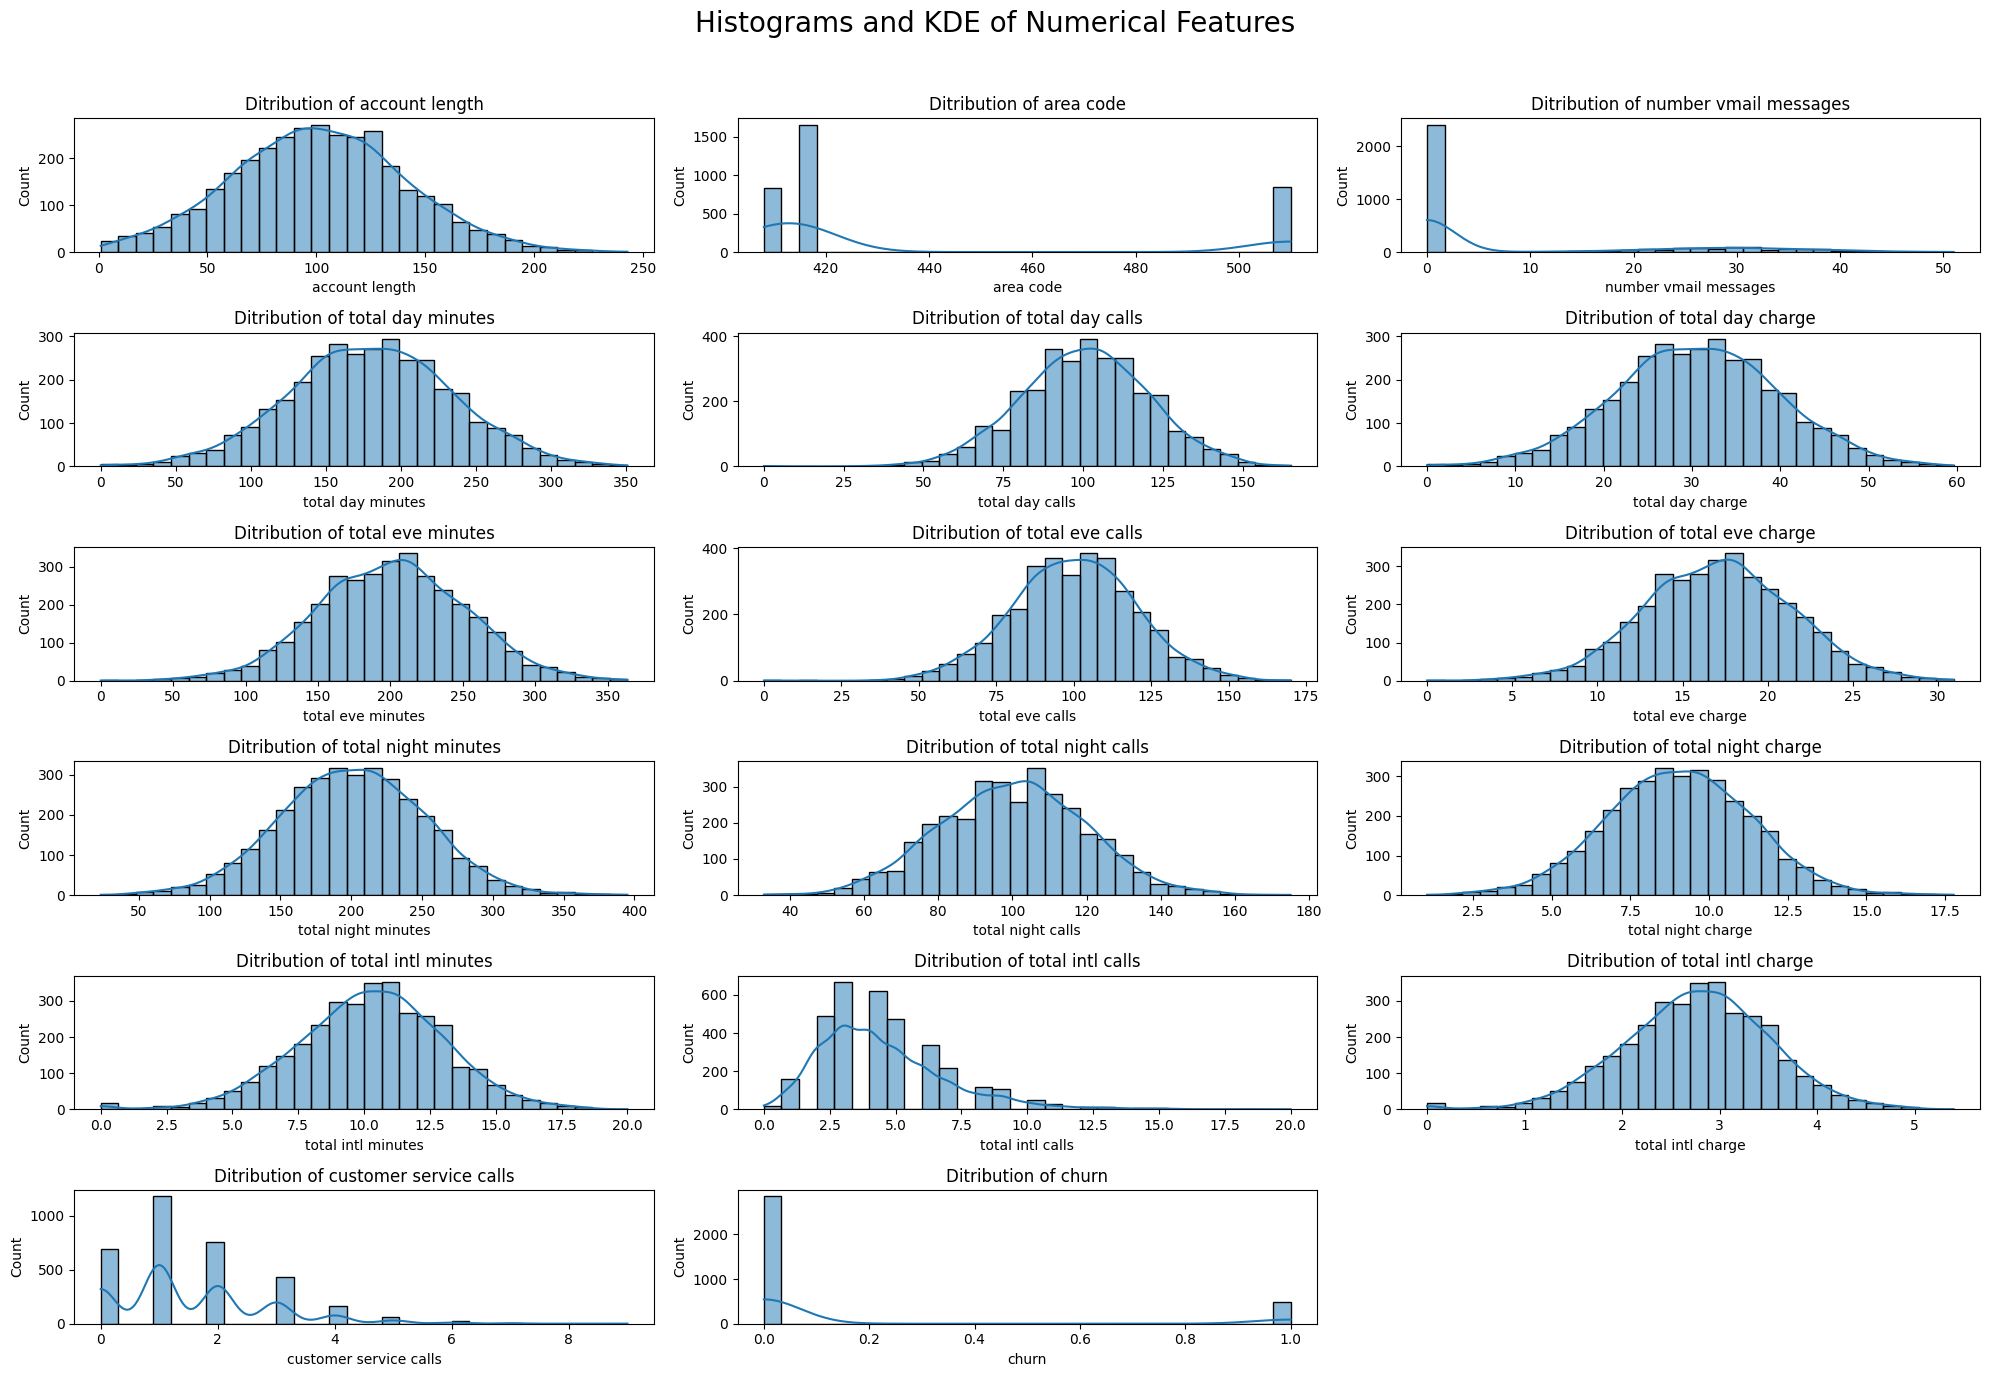

In [29]:
# Visualizing the distributions of numerical features using histograms with KDE

plt.figure(figsize=(20, 14))

for i, column in enumerate(numeric_df.columns):
    plt.subplot(len(numeric_df.columns) // 3 + 1, 3, i + 1)
    sns.histplot(numeric_df[column], kde=True, bins=30)
    plt.title(f'Ditribution of {column}')

plt.suptitle('Histograms and KDE of Numerical Features', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Visualizing Categorical Features
We use bar plots to visualize categorical data, which display the frequency of each category in the data.

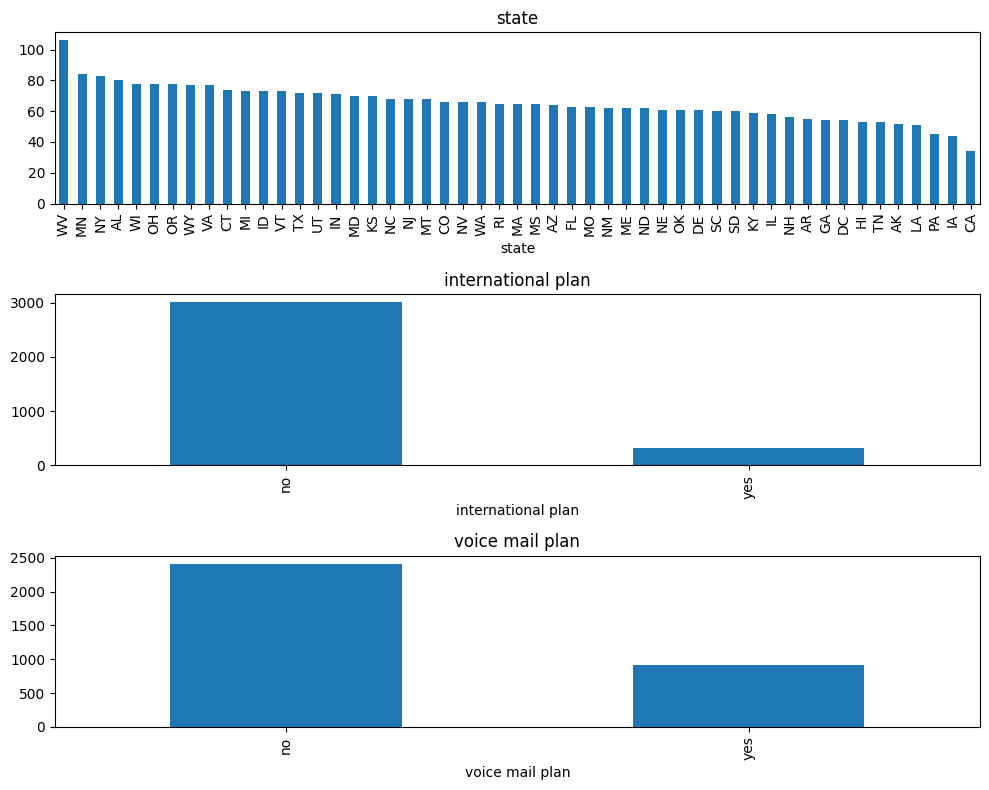

In [30]:
# Visualizing categorical features

# Create the figure and axis objects
fig, ax = plt.subplots(nrows= 3, ncols= 1, figsize=(10, 8))

# Flatten the axis array so that it can be iterated over easily
ax = ax.flatten()

# Loop over the columns and plot a density graph for each one

columns = categorical_df.columns.tolist()

for i, col in enumerate (columns):
    categorical_df[col].value_counts().plot(kind="bar", ax=ax[i])
    ax[i].set_title(col)

# Adjust the spacing between the subplots
fig.tight_layout()

Bivariate Analysis: Relationship Between Categorical Variables, Numerical Variables, and Churn
This was done to understand how each feature individually relates to the target variable. The churn column was removed from numeric_df to focus on the relationships between the other numerical features and churn.

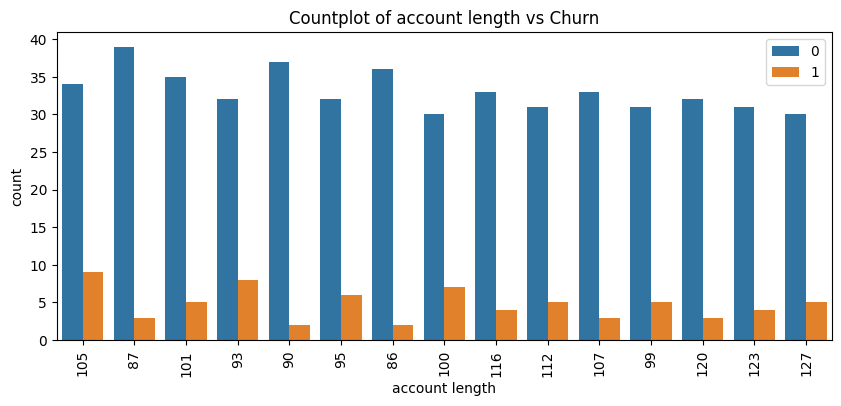

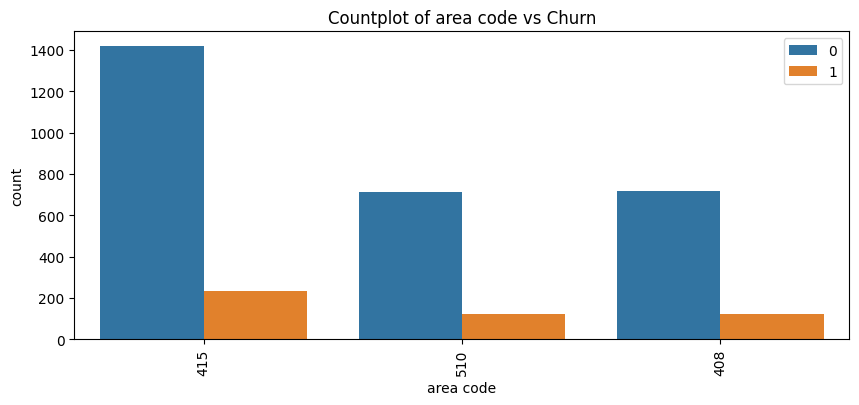

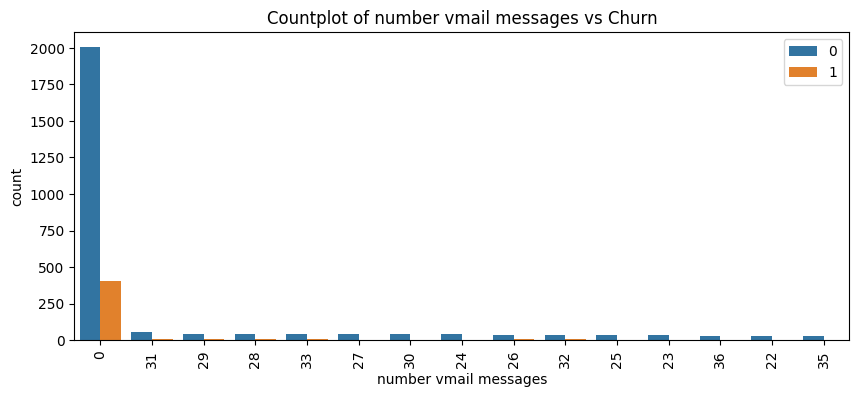

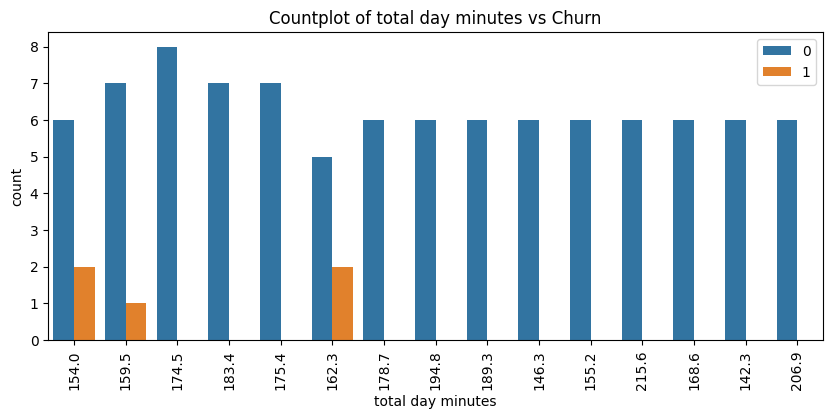

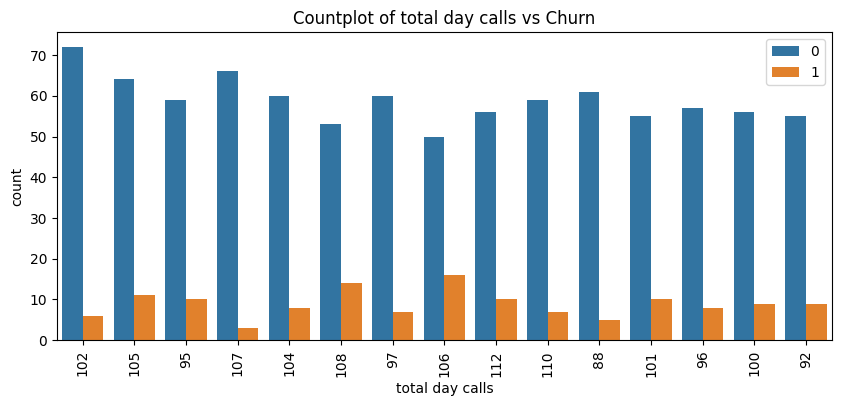

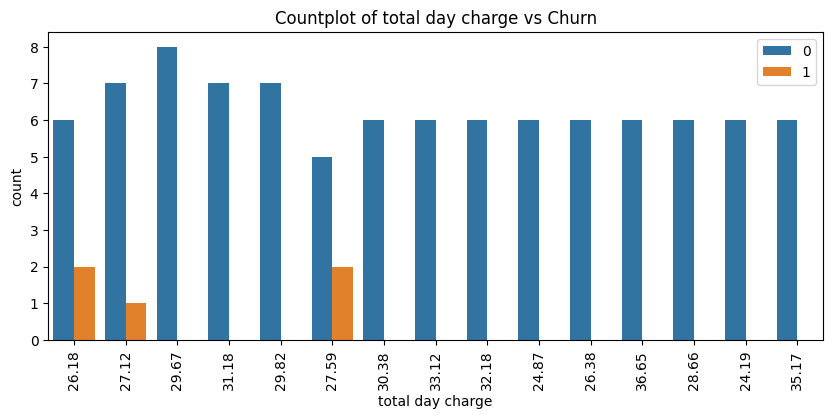

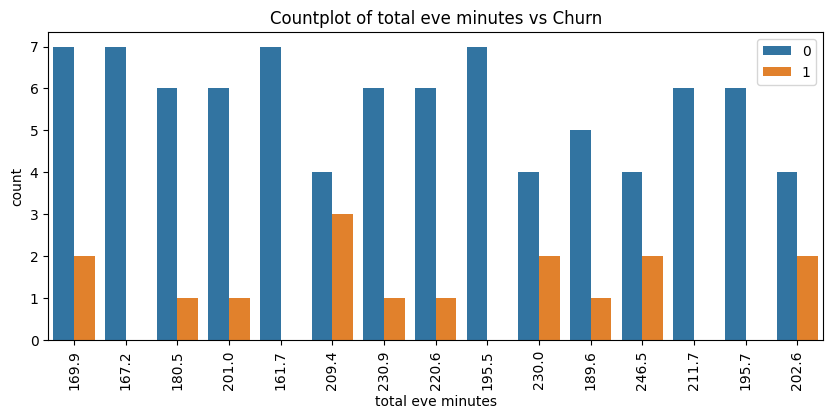

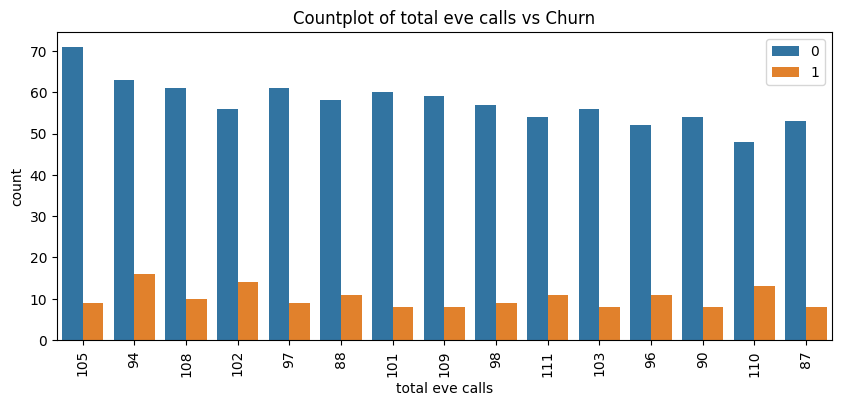

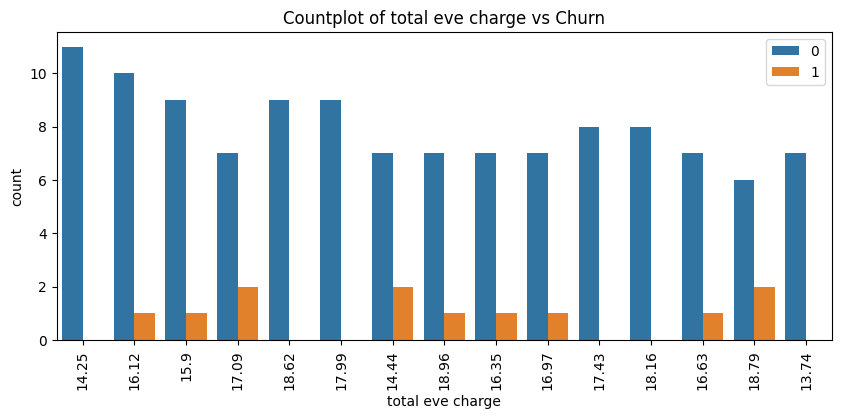

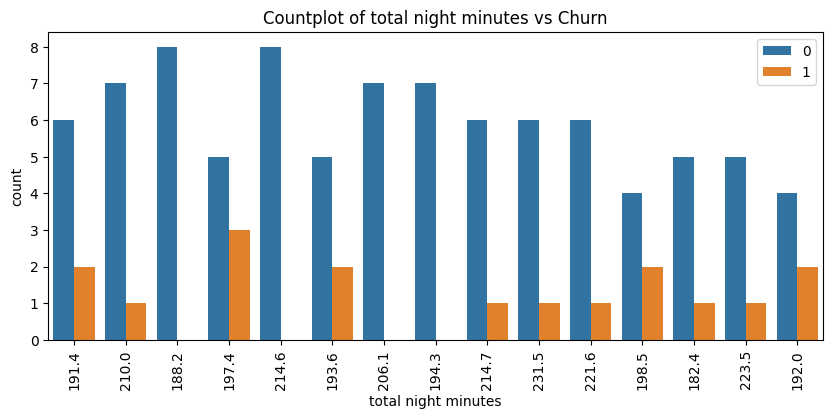

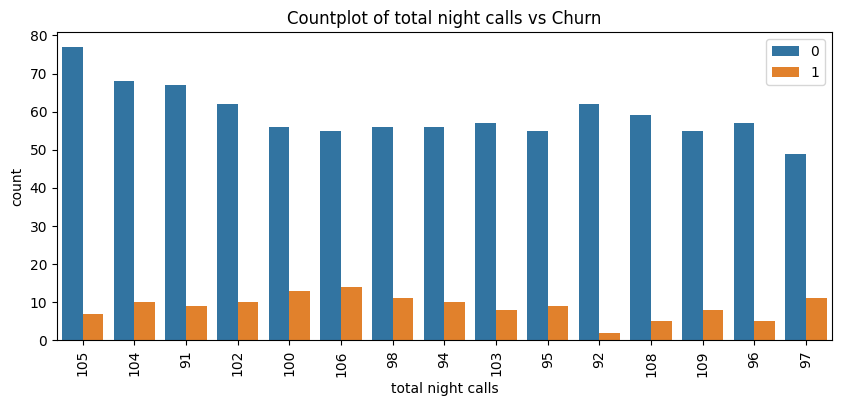

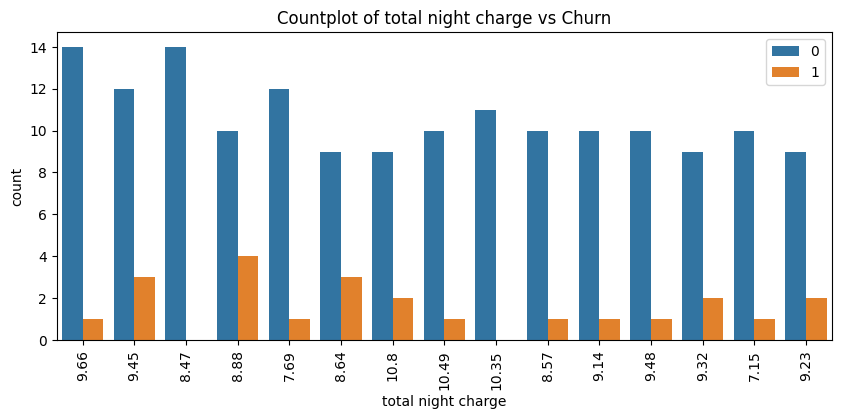

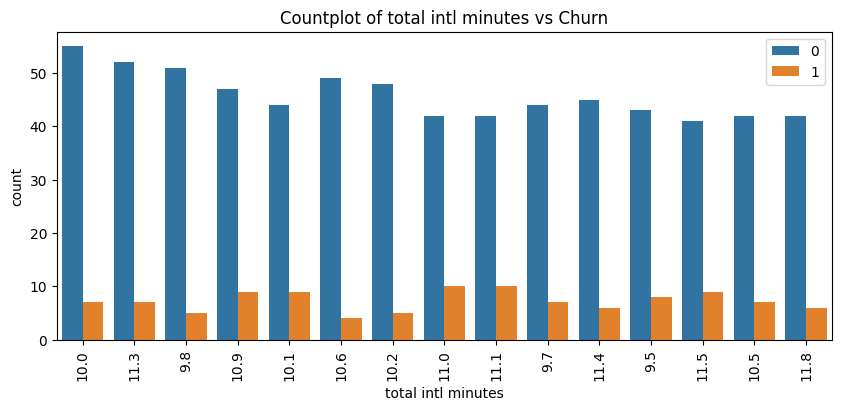

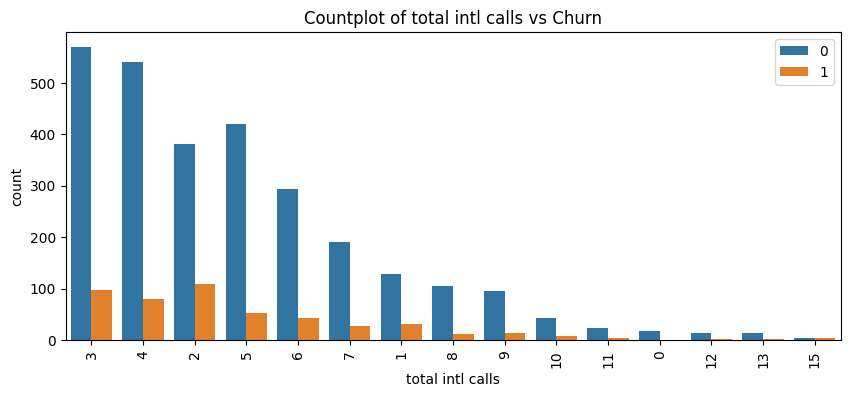

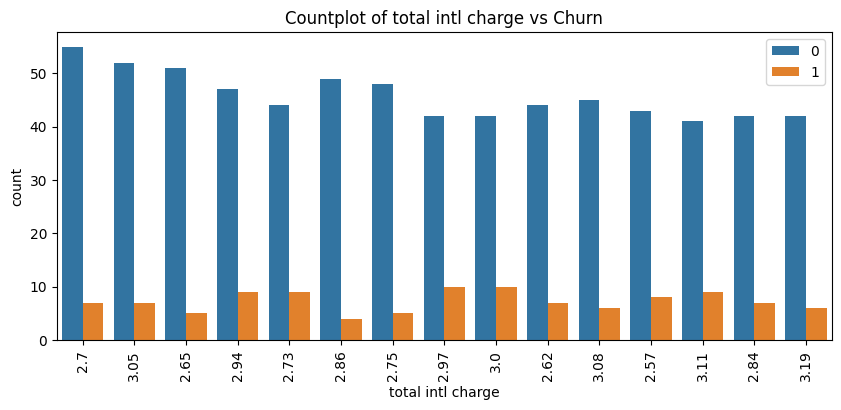

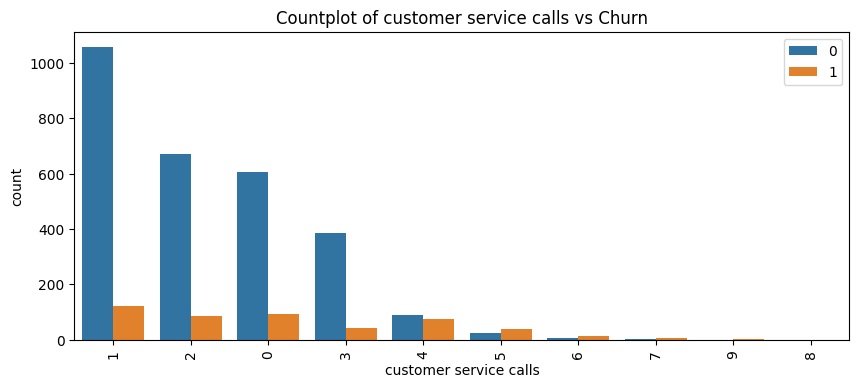

In [31]:
# Dropping the churn column from numeric_df
numeric_df = numeric_df.drop("churn", axis=1)

# Comparing numeric data to churn using countplots
for i in numeric_df:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=i, hue="churn", data=df, order=df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.title(f'Countplot of {i} vs Churn')
    plt.show()

## Comparing Categorical Data to Churn

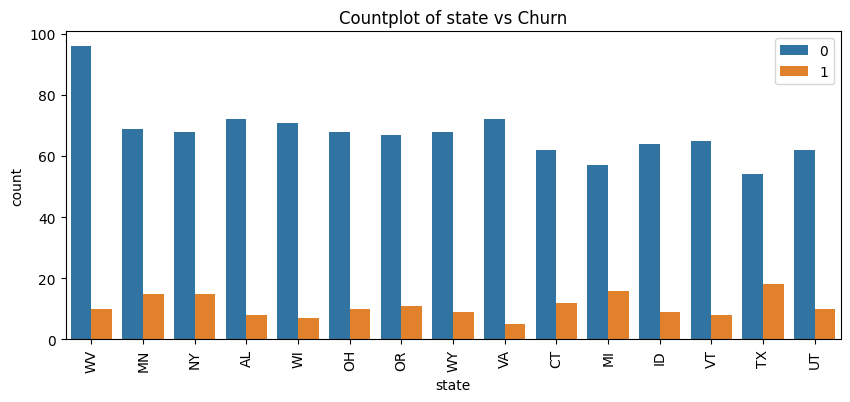

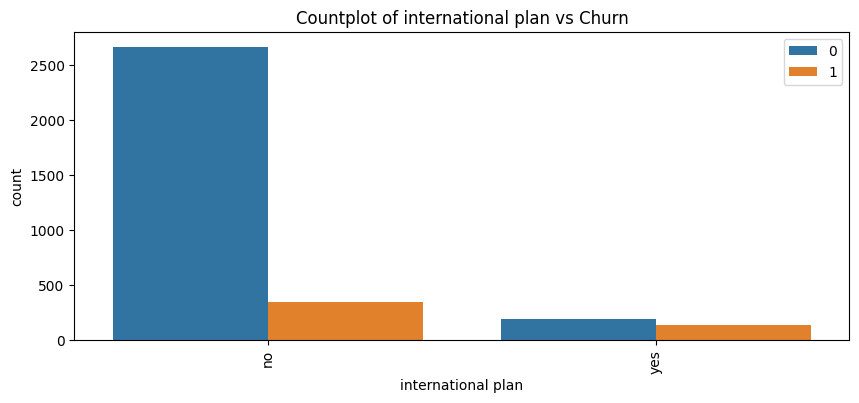

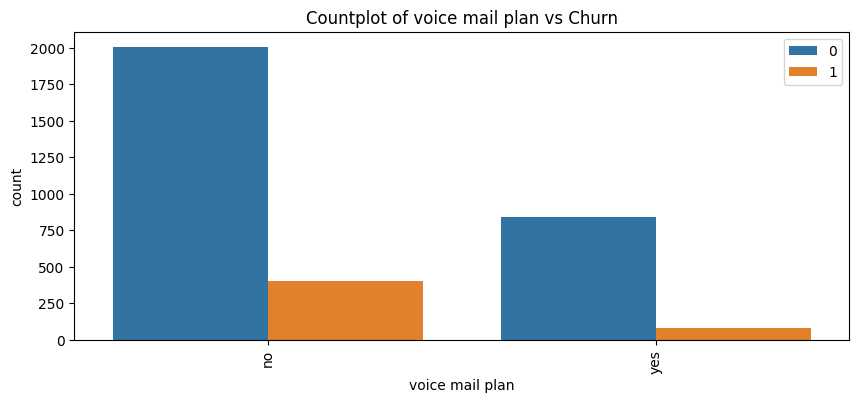

In [32]:
# Comparing categorical data to "churn"
for i in columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=i, hue="churn", data=df, order=df[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.title(f'Countplot of {i} vs Churn')
    plt.show()

# Multivariate Analysis

A heatmap was used to visualize the correlation matrix of the numerical features

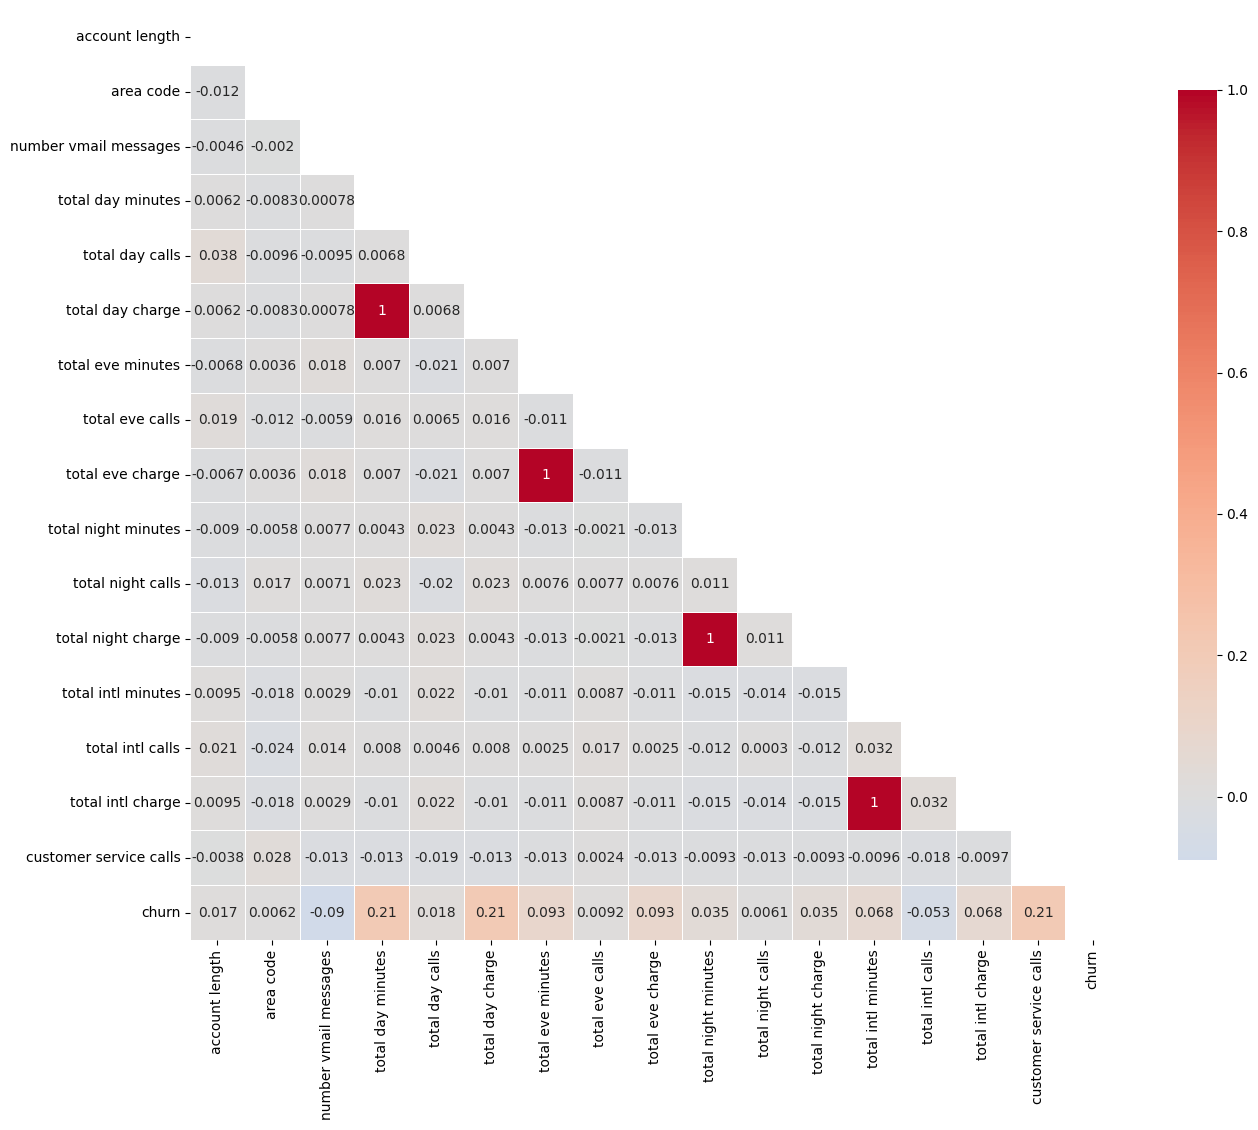

In [33]:
# using heatmap to show collinearity
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5});

From the heatmap, the following pairs of features are identified as having a correlation of 1 (perfect multicollinearity):

1. Total day minutes & Total day charge
2. Total eve minutes & Total eve charge
3. Total night minutes & Total night charge
4. Total intl minutes & Total intl charge

Perfect multicollinearity indicates that one feature can be perfectly predicted from the other. Therefore, one feature from each pair is redundant and can be dropped to simplify the model without losing information.
Dropping these features reduces the risk of overfitting and improves model interpretability by minimizing redundancy.

## Dropping Correlated Features

In [34]:
df_subset = df.drop(columns= ['total day minutes', 'total eve minutes', 'total night calls','total intl minutes','phone number' ], axis = 1)
df_subset

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night charge,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,110,45.07,99,16.78,244.7,11.01,3,2.70,1,0
1,OH,107,415,no,yes,26,123,27.47,103,16.62,254.4,11.45,3,3.70,1,0
2,NJ,137,415,no,no,0,114,41.38,110,10.30,162.6,7.32,5,3.29,0,0
3,OH,84,408,yes,no,0,71,50.90,88,5.26,196.9,8.86,7,1.78,2,0
4,OK,75,415,yes,no,0,113,28.34,122,12.61,186.9,8.41,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,77,26.55,126,18.32,279.1,12.56,6,2.67,2,0
3329,WV,68,415,no,no,0,57,39.29,55,13.04,191.3,8.61,4,2.59,3,0
3330,RI,28,510,no,no,0,109,30.74,58,24.55,191.9,8.64,6,3.81,2,0
3331,CT,184,510,yes,no,0,105,36.35,84,13.57,139.2,6.26,10,1.35,2,0


## Preprocessing

### Feature engineering

In [35]:
# 1. Combined Usage Features: Create a single feature that combines the total usage (day + evening)
df_subset['total_combined_usage'] = df_subset['total day calls'] + df_subset['total eve calls']

# 2. Combined Charge Features: Create a single feature that combines all the charges (day + evening + international)
df_subset['total_combined_charge'] = df_subset['total day charge'] + df_subset['total eve charge'] + df_subset['total intl charge']

# 3. Ratio of customer service calls to account length
df_subset['cust_serv_calls_ratio'] = df_subset['customer service calls'] / df_subset['account length']

# 4. Binary Feature for high customer service interaction (over a threshold)
df_subset['high_cust_service_calls'] = df_subset['customer service calls'].apply(lambda x: 1 if x > 3 else 0)

In [36]:
# Dropping Unnecessary Features
# List of features to drop (those used in creating new features)
features_to_drop = [
    'total day calls', 'total eve calls',  # Combine into 'total_combined_usage'
    'total day charge', 'total eve charge', 'total intl charge',  # Combine into 'total_combined_charge'
    'customer service calls', 'account length'  # Used for ratio and binary features
]

# Drop the unnecessary features
df_subset = df_subset.drop(columns=features_to_drop)

# Display the remaining features in the DataFrame
df_subset.head()

,state,area code,international plan,voice mail plan,number vmail messages,total night minutes,total night charge,total intl calls,churn,total_combined_usage,total_combined_charge,cust_serv_calls_ratio,high_cust_service_calls
0,KS,415,no,yes,25,244.7,11.01,3,0,209,64.55,0.007812,0
1,OH,415,no,yes,26,254.4,11.45,3,0,226,47.79,0.009346,0
2,NJ,415,no,no,0,162.6,7.32,5,0,224,54.97,0.000000,0
3,OH,408,yes,no,0,196.9,8.86,7,0,159,57.94,0.023810,0
4,OK,415,yes,no,0,186.9,8.41,3,0,235,43.68,0.040000,0


### Encoding

Encoding Categorical Variables

Categorical variables were converted into numerical using one-hot encoding. The data is  then split into predictor variables (X) and the target variable (y), and further split into training and testing sets to allow for model training and evaluation.

In [37]:
# one hot encoding categorical values
df_encoded = pd.get_dummies(df_subset)
df_encoded

,area code,number vmail messages,total night minutes,total night charge,total intl calls,churn,total_combined_usage,total_combined_charge,cust_serv_calls_ratio,high_cust_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,415,25,244.7,11.01,3,0,209,64.55,0.007812,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,415,26,254.4,11.45,3,0,226,47.79,0.009346,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,415,0,162.6,7.32,5,0,224,54.97,0.000000,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,408,0,196.9,8.86,7,0,159,57.94,0.023810,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
4,415,0,186.9,8.41,3,0,235,43.68,0.040000,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,415,36,279.1,12.56,6,0,203,47.54,0.010417,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3329,415,0,191.3,8.61,4,0,112,54.92,0.044118,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False
3330,510,0,191.9,8.64,6,0,167,59.10,0.071429,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3331,510,0,139.2,6.26,10,0

Splitting Data

The data is then split into predictor variables (X) and the target variable (y), and further split into training and testing sets to allow for model training and evaluation.

In [38]:
# Spliting data into predictor and target Variables
y = df_encoded.churn
X = df_encoded.drop(['churn'], axis=1)

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling the Data

Standardization is applied to scale the features so that they have a mean of 0 and a standard deviation of 1.

In [40]:
# Scaling the data

scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Transform the test data using the same scaler
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


X_test_scaled.head()

,area code,number vmail messages,total night minutes,total night charge,total intl calls,total_combined_usage,total_combined_charge,cust_serv_calls_ratio,high_cust_service_calls,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,1.735840,-0.584936,-0.219520,-0.220859,-0.593980,-0.053505,0.758956,-0.139196,-0.297670,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,6.534900,0.326624,-0.326624,0.611162,-0.611162
1,-0.517168,-0.584936,-0.239243,-0.238391,0.634849,1.438671,-0.967120,-0.221276,-0.297670,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,7.719515,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025,0.326624,-0.326624,0.611162,-0.611162
2,-0.517168,-0.584936,-0.659356,-0.659155,-1.413199,-2.504937,-3.425381,0.157299,3.359422,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,7.090080,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025,0.326624,-0.326624,0.611162,-0.611162
3,-0.683179,-0.584936,-0.874343,-0.873920,-1.003589,-1.083817,0.580566,-0.158180,-0.297670,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,7.464811,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,-0.153025,0.326624,-0.326624,0.611162,-0.611162
4,-0.683179,-0.584936,0.535893,0.537392,1.044458,-0.906177,-0.399602,-0.124661,-0.297670,-0.128037,-0.154303,-0.124976,-0.142419,-0.101149,-0.147809,-0.151736,-0.124976,-0.139653,-0.13825,-0.128037,-0.133962,-0.120248,-0.146478,-0.129542,-0.141042,-0.142419,-0.133962,-0.129542,-0.143784,-0.150437,-0.135405,-0.151736,-0.163,-0.141042,-0.132504,-0.145137,-0.142419,-0.135405,-0.121843,-0.124976,-0.142419,-0.141042,-0.141042,-0.158083,-0.160559,-0.136835,-0.150437,-0.115338,-0.143784,-0.133962,-0.141042,-0.129542,-0.150437,-0.149128,-0.154303,-0.145137,-0.147809,-0.161784,-0.180369,6.534900,0.326624,-0.326624,0.611162,-0.611162


Handling Class Imbalance with SMOTE

Synthetic Minority Over-sampling Technique is applied to address class imbalance by generating synthetic samples for the minority class, ensuring that the model is not biased towards the majority class.

In [41]:
# Using SMOTE to deal with class imbalance

# Previous original class distribution
print(y_train.value_counts())

# Fit SMOTE to training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Preview synthetic sample class distribution
print('\n')
print(pd.Series(y_train_resampled).value_counts())

churn
0    2284
1     382
Name: count, dtype: int64


churn
0    2284
1    2284
Name: count, dtype: int64


## Modeling

In [42]:
# Creating a function to calculate evaluation metrics

def evaluate_model_performance(y_train_resampled, y_hat_train, y_test, y_hat_test):
    # Calculate metrics
    metrics = {
        'Metric': ['Precision', 'Recall', 'Accuracy', 'F1-Score'],
        'Training': [
            precision_score(y_train_resampled, y_hat_train),
            recall_score(y_train_resampled, y_hat_train),
            accuracy_score(y_train_resampled, y_hat_train),
            f1_score(y_train_resampled, y_hat_train)
        ],
        'Testing': [
            precision_score(y_test, y_hat_test),
            recall_score(y_test, y_hat_test),
            accuracy_score(y_test, y_hat_test),
            f1_score(y_test, y_hat_test)
        ]
    }

    # Create a DataFrame to store the results
    metrics_df = pd.DataFrame(metrics)

    # Display the DataFrame
    display(metrics_df)
    return metrics_df

In [43]:
# Creating a function to plot a confusion matrix
def plot_confusion_matrix(y_test, y_hat_test, figsize=(10, 4), cmap='coolwarm'):
    """
    Plots a heatmap of the confusion matrix.

    Parameters:
    y_test (array-like): True labels of the test set.
    y_hat_test (array-like): Predicted labels of the test set.
    figsize (tuple): Size of the figure for the plot.
    cmap (str): Colormap to use for the heatmap.

    Returns:
    None
    """
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_hat_test)

    # Plotting the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, cmap=cmap, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [44]:
# Creating a function to plot ROC and AUC
def plot_roc_curve(lr, X_test, y_test, figsize=(20, 8)):
    """
    Plots the ROC curve and prints the AUC score.

    Parameters:
    lr (model): The trained logistic regression model.
    X_test (array-like): The test dataset features.
    y_test (array-like): The true labels of the test dataset.
    figsize (tuple): Size of the figure for the plot.

    Returns:
    None
    """
    # Calculate the predicted probabilities
    y_pred_prob = lr.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the area under the ROC curve
    auc = roc_auc_score(y_test, y_pred_prob)

    # Plot the ROC curve
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

    # Print the AUC score
    print('The AUC score is:', auc)

## Model 1: Logistic Regression

A Logistic Regression model was trained on the resampled data and predictions are made for both the training and testing datasets.

In [45]:
# create an instance
lr = LogisticRegression()

# fit the model
lr.fit(X_train_resampled, y_train_resampled)

# predict the model
y_hat_train = lr.predict(X_train_resampled)
y_hat_test=lr.predict(X_test)

## Evaluation Metrics for Logistic Regression

In [46]:
metrics_df = evaluate_model_performance(y_train_resampled, y_hat_train, y_test, y_hat_test)

,Metric,Training,Testing
0,Precision,0.853076,0.478261
1,Recall,0.813485,0.653465
2,Accuracy,0.836690,0.839580
3,F1-Score,0.832810,0.552301


 The model shows signs of overfitting, as evidenced by the
significant drop in precision and F1-score when moving from training to testing data.

 The relatively consistent recall and accuracy suggest that the
model is able to correctly identify a fair number of positive cases and has a similar overall performance between training and testing sets.

## Confusion Matrix and ROC Curve for Logistic Regression

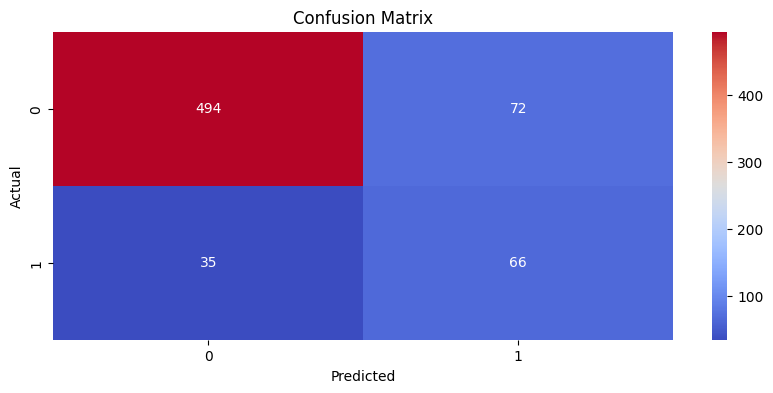

In [47]:
plot_confusion_matrix(y_test, y_hat_test)

Interpretation:



*  True Positives (TP): The model correctly predicted the positive class (74).
*  True Negatvies (TN): The model correctly predicted the negative class (507).


*   False Positives (FP): The model incorrectly predicted the positive class when it was actually negative (59).

*   False Negatives (FN): The model incorrectly predicted the negative class when it was actually positive (27).

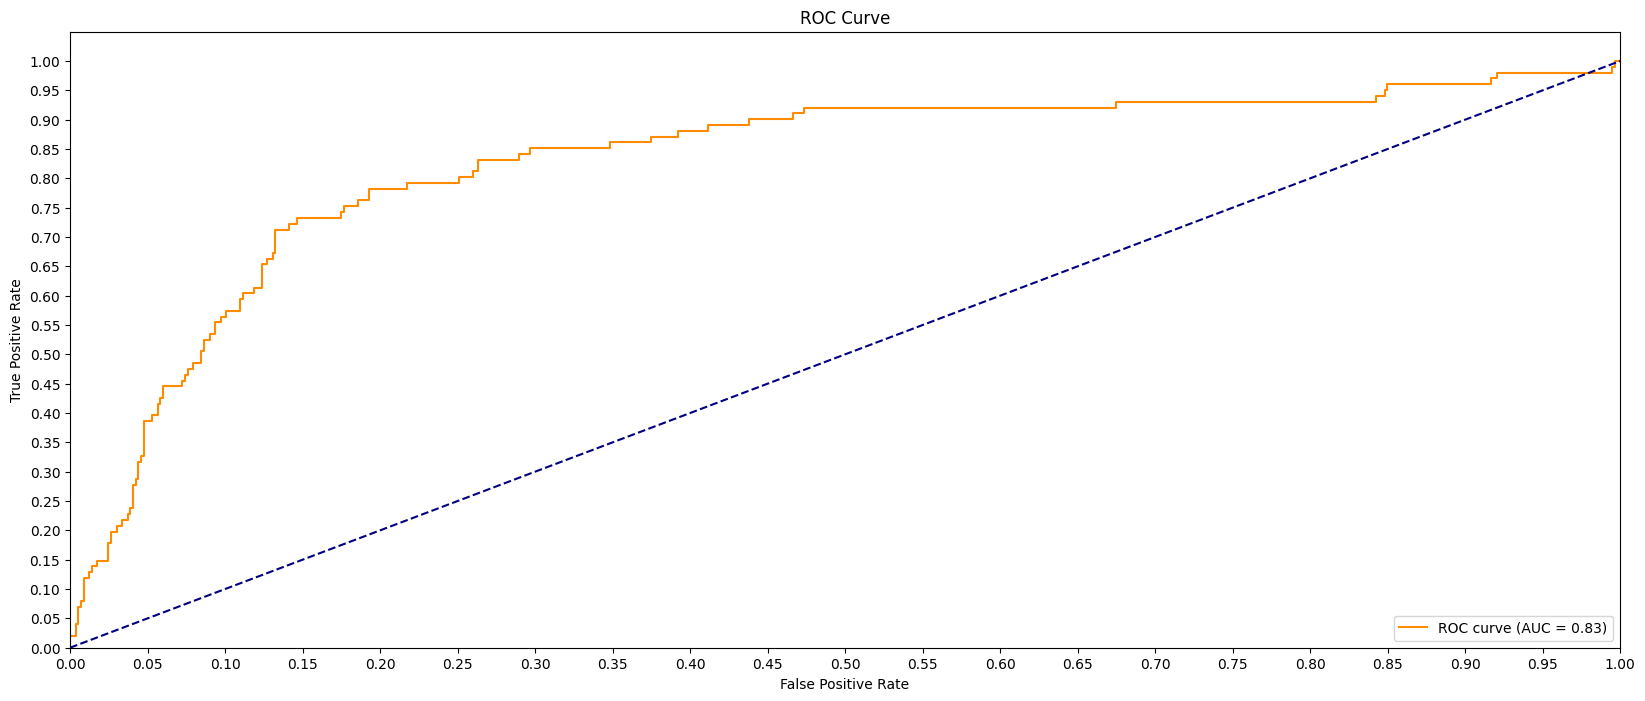

The AUC score is: 0.8292866389112411


In [48]:
plot_roc_curve(lr, X_test, y_test)

The AUC score is: 0.853864185005073

The ROC curve is above the diagonal line, indicating that the model performs better than random guessing.
The AUC score of 0.85 indicates that the model has a good ability to distinguish between the positive and negative classes.

## Model 2: Decision Trees

In [49]:
Dt = DecisionTreeClassifier(random_state = 42)
# fit the model
Dt.fit(X_train_resampled, y_train_resampled)

# predict
y_hat_train = Dt.predict(X_train_resampled)
y_hat_test= Dt.predict(X_test)

## Evaluation Metrics for Decision Tress

In [50]:
# Testing the perfomance of the model using different metrics
metrics_df = evaluate_model_performance(y_train_resampled, y_hat_train, y_test, y_hat_test)

,Metric,Training,Testing
0,Precision,1.0,0.584615
1,Recall,1.0,0.752475
2,Accuracy,1.0,0.881559
3,F1-Score,1.0,0.658009


The model shows signs of overfitting, as evidenced by the significant drop in precision and F1-score when moving from training to testing data.

## Confusion Matrix and ROC Curve for Decision Trees

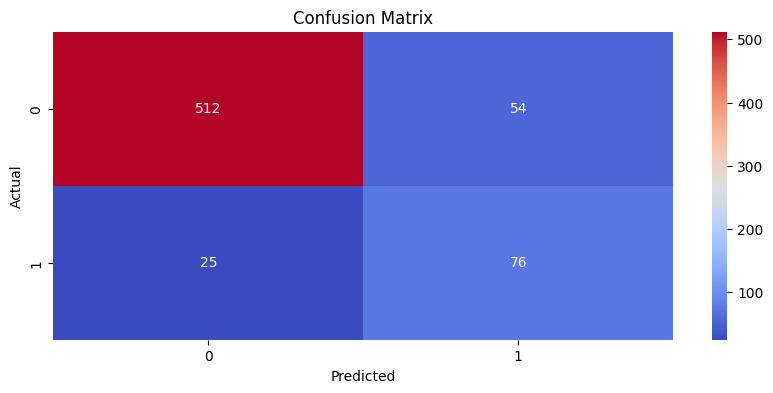

In [51]:
plot_confusion_matrix(y_test, y_hat_test)


Interpretation:


* True Positives (TP): 84 cases were correctly predicted as positive.

* True Negatives (TN): 495 cases were correctly predicted as negative.

* False Positives (FP): 71 cases were incorrectly predicted as positive when they were actually negative.

* False Negatives (FN): 17 cases were incorrectly predicted as negative when they were actually positive.








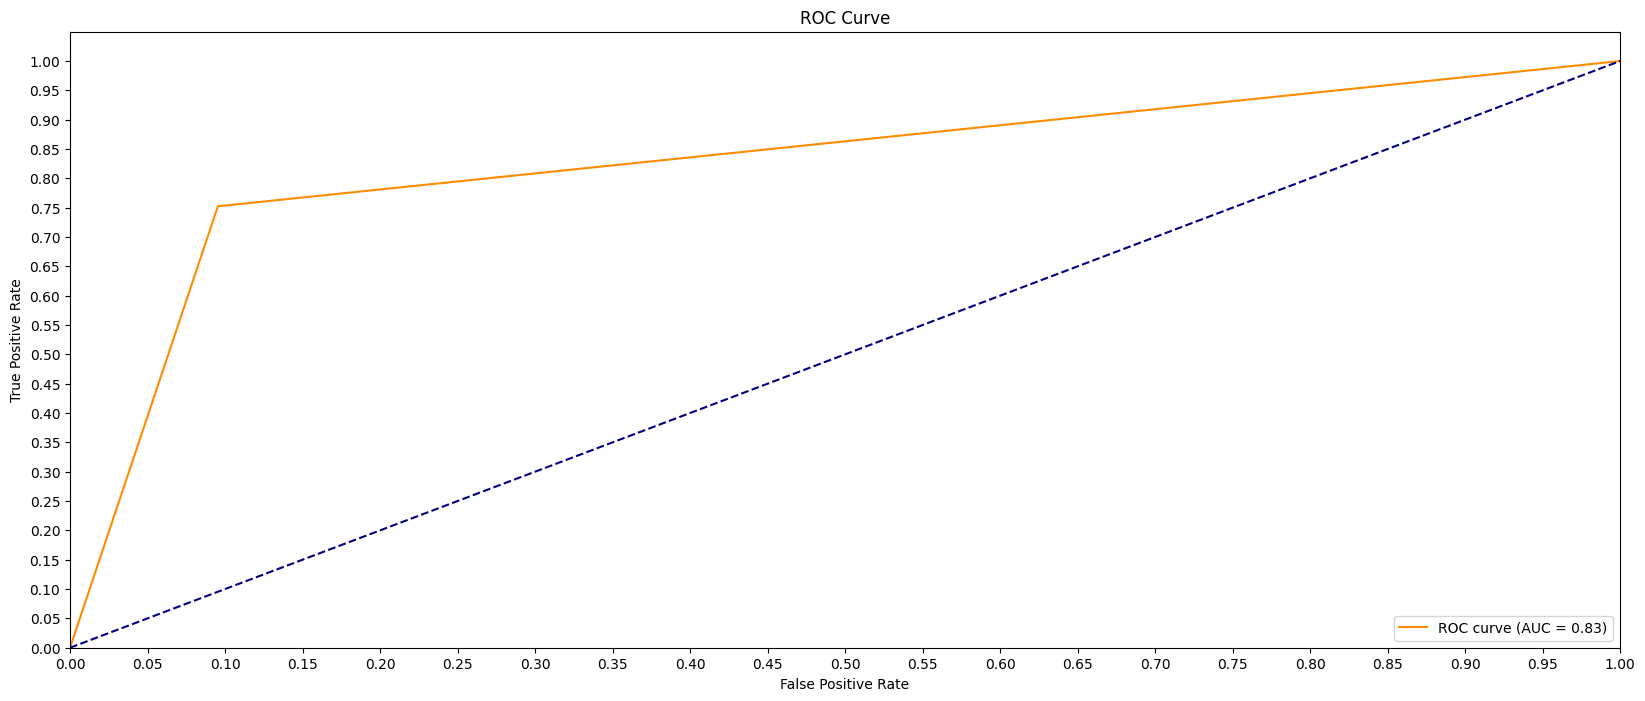

The AUC score is: 0.8285344435503621


In [52]:
plot_roc_curve(Dt, X_test, y_test)



* The ROC curve is above the diagonal line, indicating that the model performs better than random guessing.

* The AUC score of 0.85 indicates that the model has a good ability to distinguish between the positive and negative classes.



## Model 3: Random Forest

In [53]:
# Create an instance of the Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Fit the model on the resampled training data
rf.fit(X_train_resampled, y_train_resampled)

# Predict on both the training and testing datasets
y_hat_train_rf = rf.predict(X_train_resampled)
y_hat_test_rf = rf.predict(X_test)

## Evaluation Metrics for Random Forest

In [54]:
# Testing the perfomance of the model using different metrics
metrics_df = evaluate_model_performance(y_train_resampled, y_hat_train, y_test, y_hat_test)

,Metric,Training,Testing
0,Precision,1.0,0.584615
1,Recall,1.0,0.752475
2,Accuracy,1.0,0.881559
3,F1-Score,1.0,0.658009


The model shows signs of overfitting, as evidenced by the significant drop in precision and F1-score when moving from training to testing data.

## Confusion Matrix and ROC Curve for Random Forest

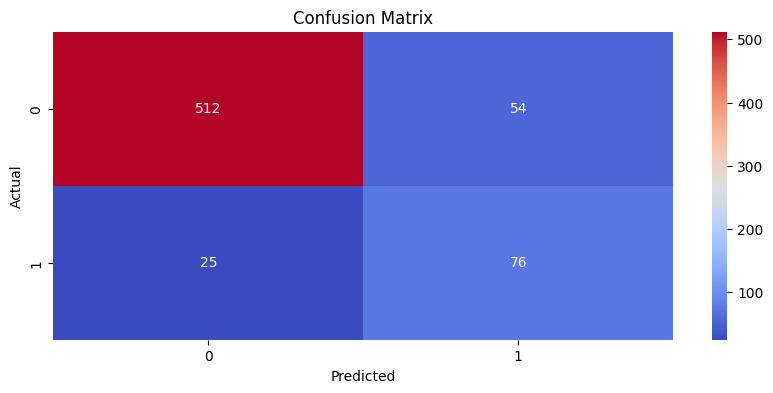

In [55]:
plot_confusion_matrix(y_test, y_hat_test)

Interpretation:

*  True Positives (TP): The model correctly predicted the positive class (84).
*   True Negatives (TN): The model correctly predicted the negative class (495).
*   False Positives (FP): The model incorrectly predicted the positive class when it was actually negative (71).
*  False Negatives (FN): The model incorrectly predicted the negative class when it was actually positive (17).







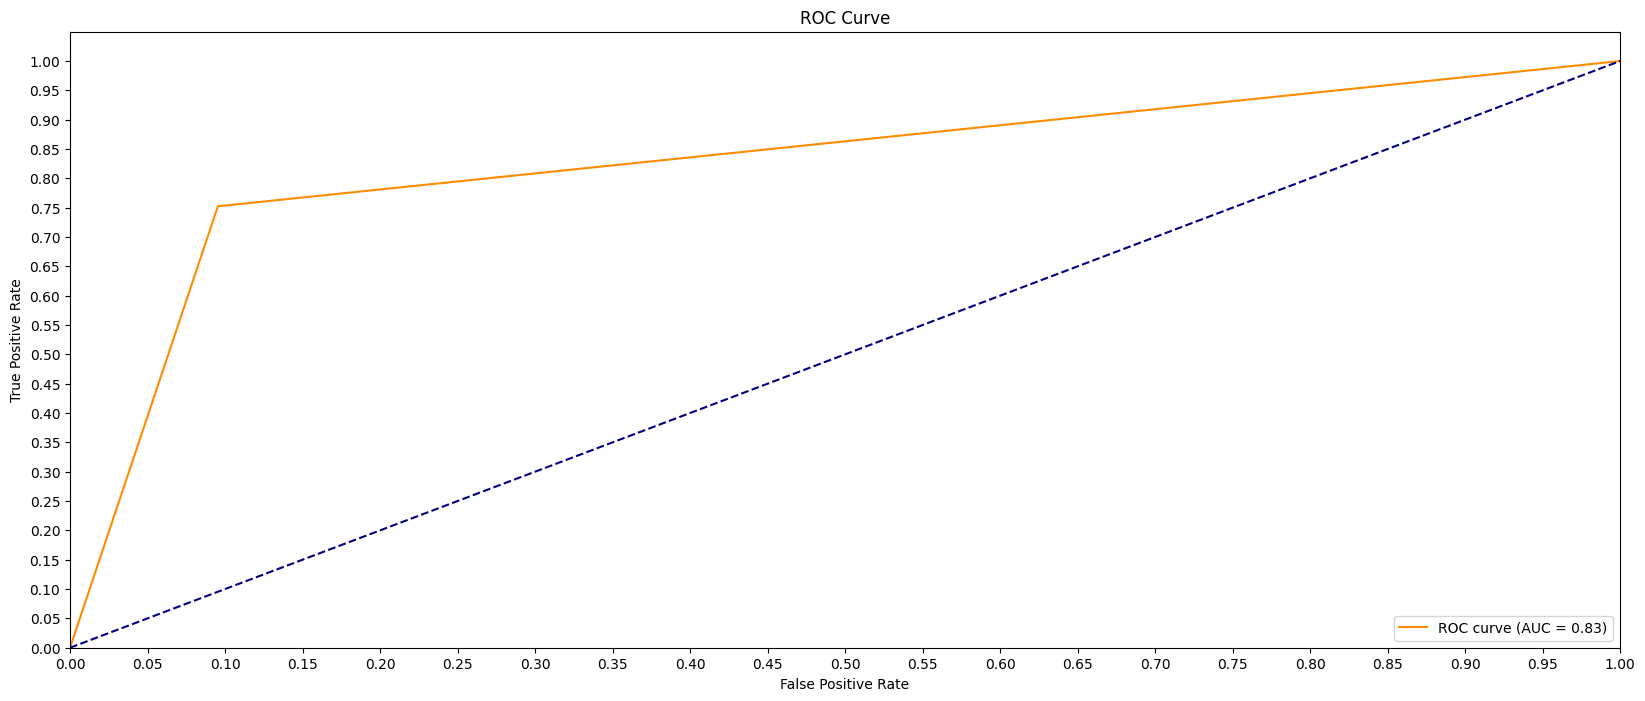

The AUC score is: 0.8285344435503621


In [56]:
plot_roc_curve(Dt, X_test, y_test)


* The ROC curve is above the diagonal line, indicating that the model performs better than random guessing.

* The AUC score of 0.85 indicates that the model has a good ability to distinguish between the positive and negative classes






# Model Tuning

The models were improved using hyperparameter tuning. Hyperparameter tuning involves finding the best combination of parameters for the model, which can enhance its performance on the validation set and subsequently improve generalization to unseen data.

## 1. Hyperparameter Tuning for Logistic Regression

In [60]:
# Define the hyperparameters grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga']
}

# Set up the grid search
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_lr.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best accuracy for Logistic Regression:", grid_search_lr.best_score_)

Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.8960483269860824


In [61]:
# Logistic Regression with best parameters
best_lr = grid_search_lr.best_estimator_
best_lr.fit(X_train_resampled, y_train_resampled)

# predict the model
y_hat_train = best_lr.predict(X_train_resampled)
y_hat_test= best_lr.predict(X_test)

# Evaluation Metrics for Tuned Logistic Regression




In [62]:
metrics_df = evaluate_model_performance(y_train_resampled, y_hat_train, y_test, y_hat_test)

,Metric,Training,Testing
0,Precision,0.956605,0.509091
1,Recall,0.878284,0.277228
2,Accuracy,0.919221,0.850075
3,F1-Score,0.915773,0.358974


The significant difference in performance between the training and testing sets indicates that the model is overfitting.

## Confusion Matrix and ROC Curve for Tuned Logistic Regression

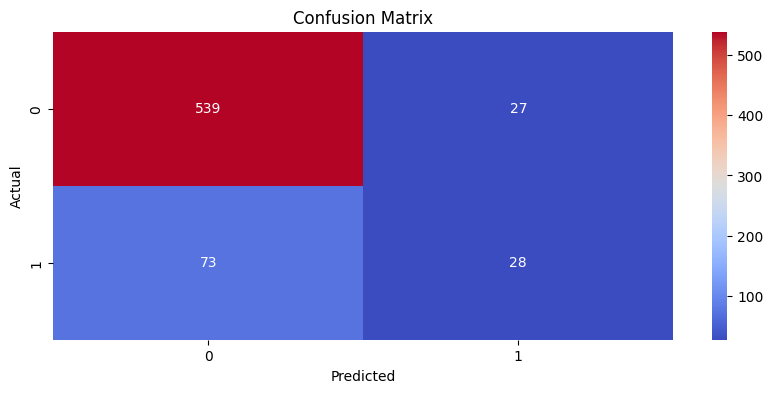

In [63]:
plot_confusion_matrix(y_test, y_hat_test)

Interpretation:


* True Positives (TP): The model correctly predicted the positive class (27).
* True Negatives (TN): The model correctly predicted the negative class (539).
* False Positives (FP): The model incorrectly predicted the positive class when it was actually negative (27).
* False Negatives (FN): The model incorrectly predicted the negative class when it was actually positive (74).








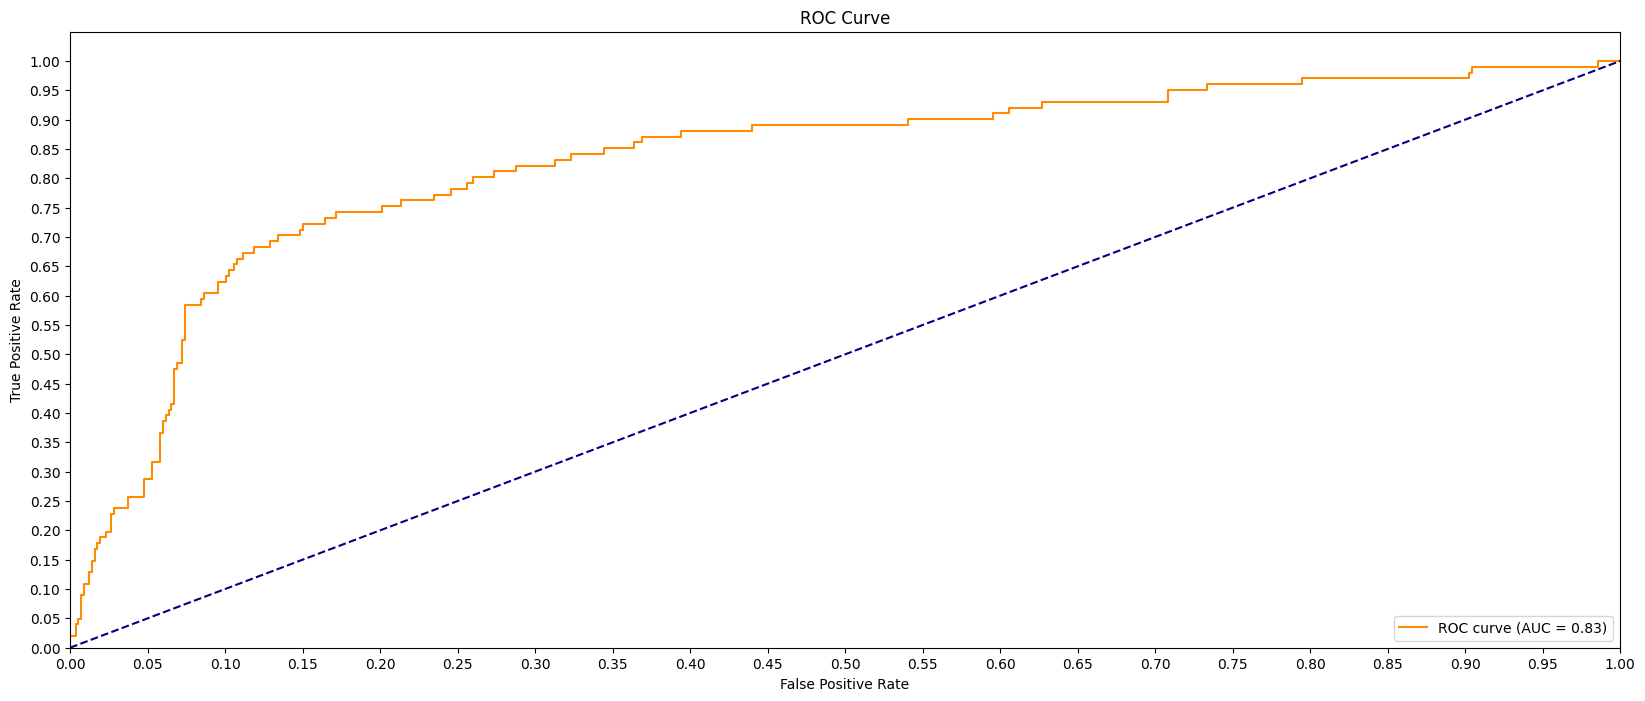

The AUC score is: 0.8313682958401848


In [64]:
plot_roc_curve(best_lr, X_test, y_test)



* The ROC curve is above the diagonal line, indicating that the model performs better than random guessing.
* The AUC score of 0.83 indicates that the model has a good ability to distinguish between the positive and negative classes.






# 2. Hyperparameter Tuning for Decision Tree

In [65]:
# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Set up the grid search
grid_search_Dt = GridSearchCV(Dt, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_Dt.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best parameters for Decision Tree:", grid_search_Dt.best_params_)
print("Best accuracy for Decision Tree:", grid_search_Dt.best_score_)

Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy for Decision Tree: 0.9146260794121384


In [66]:
best_Dt = grid_search_Dt.best_estimator_
best_Dt.fit(X_train_resampled, y_train_resampled)

y_hat_train = best_Dt.predict(X_train_resampled)
y_hat_test= best_Dt.predict(X_test)

## Evaluation Metrics for Tuned Decision Tree

In [67]:
metrics_df = evaluate_model_performance(y_train_resampled, y_hat_train, y_test, y_hat_test)

,Metric,Training,Testing
0,Precision,1.0,0.584615
1,Recall,1.0,0.752475
2,Accuracy,1.0,0.881559
3,F1-Score,1.0,0.658009


Compared to the tuned logistic model, this one shows better generalization, especially in terms of recall and accuracy on the testing set. However, the significant drop in precision and F1-score from training to testing still suggests some level of overfitting

## Confusion Matrix and ROC Curve for Tuned Decision Tree

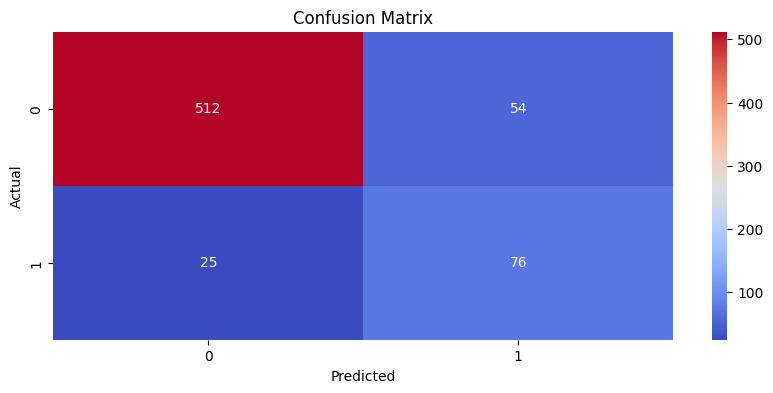

In [68]:
plot_confusion_matrix(y_test, y_hat_test)

Interpretation:


*   True Positives (TP): The model correctly predicted the positive class (78).
*   True Negatives (TN): The model correctly predicted the negative class (525).
*   False Positives (FP): The model incorrectly predicted the positive class when it was actually negative (41).
* False Negatives (FN): The model incorrectly predicted the negative class when it was actually positive (23).








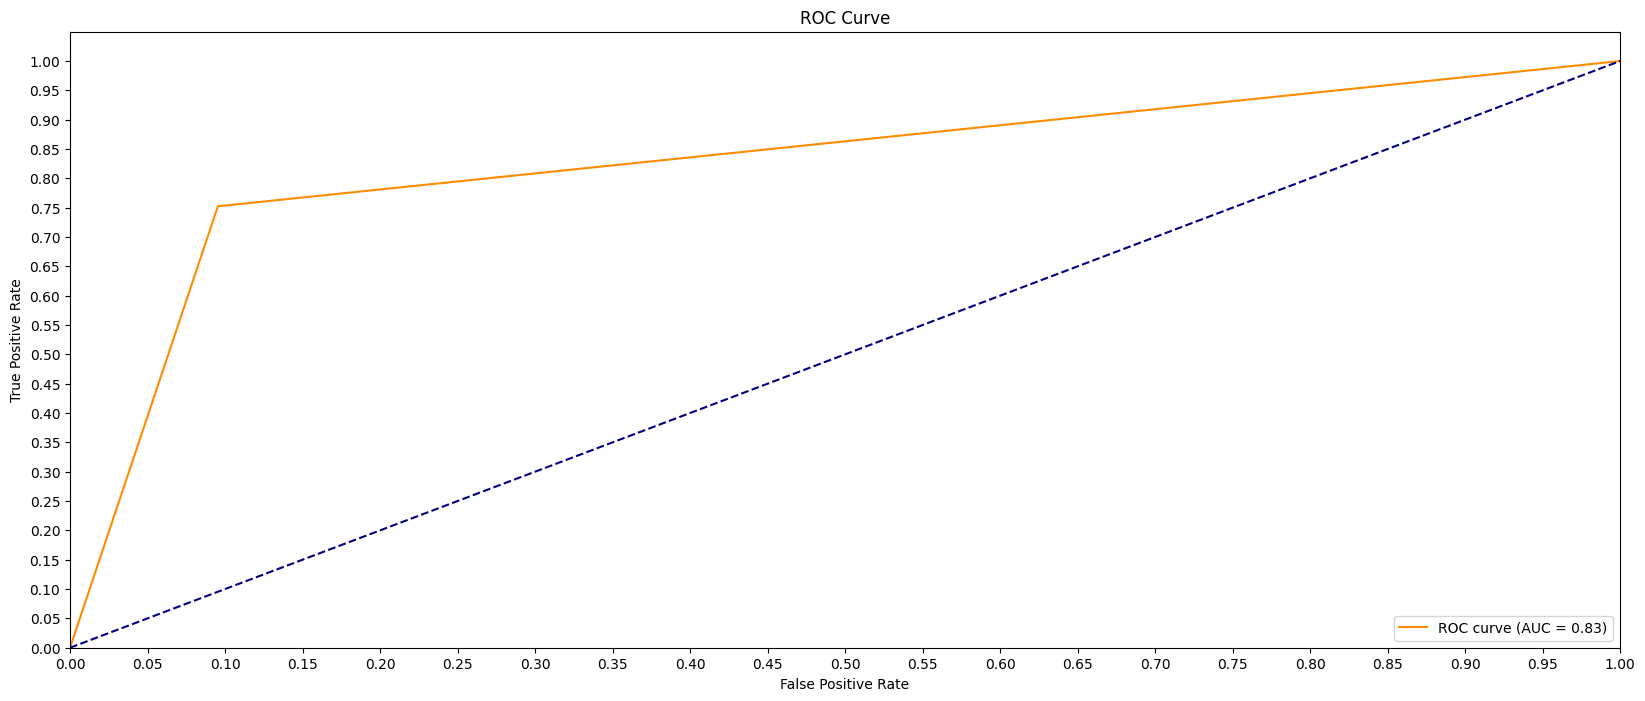

The AUC score is: 0.8285344435503621


In [73]:
plot_roc_curve(best_Dt, X_test, y_test)


*   The ROC curve is above the diagonal line, indicating that the model performs better than random guessing.
*   The AUC score of 0.87 indicates that the model has a good ability to distinguish between the positive and negative classes.




## 3. Hyperparameter Tuning for Random Forest

In [79]:
# Define the hyperparameters grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

# Create the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up the grid search
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best accuracy for Random Forest:", grid_search_rf.best_score_)

Best parameters for Random Forest: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy for Random Forest: 0.9588468055632117


In [80]:
# Best model after hyperparameter tuning
best_rf = grid_search_rf.best_estimator_

# Fit the model on the resampled training data
best_rf.fit(X_train_resampled, y_train_resampled)

# Predict on both the training and testing datasets
y_hat_train_rf = best_rf.predict(X_train_resampled)
y_hat_test_rf = best_rf.predict(X_test)

## Evaluation Metrics for Tuned Random Forest

In [81]:
# Evaluate the model performance
metrics_df_rf = evaluate_model_performance(y_train_resampled, y_hat_train_rf, y_test, y_hat_test_rf)

,Metric,Training,Testing
0,Precision,1.0,0.775281
1,Recall,1.0,0.683168
2,Accuracy,1.0,0.922039
3,F1-Score,1.0,0.726316


The model demonstrates severe overfitting, as indicated by the perfect scores across all metrics on the training data and the significant drops on the testing data. This suggests that the model has memorized the training data rather than learning patterns that generalize to new data.

# Confusion Matrix and ROC Curve for Tuned Random Forest

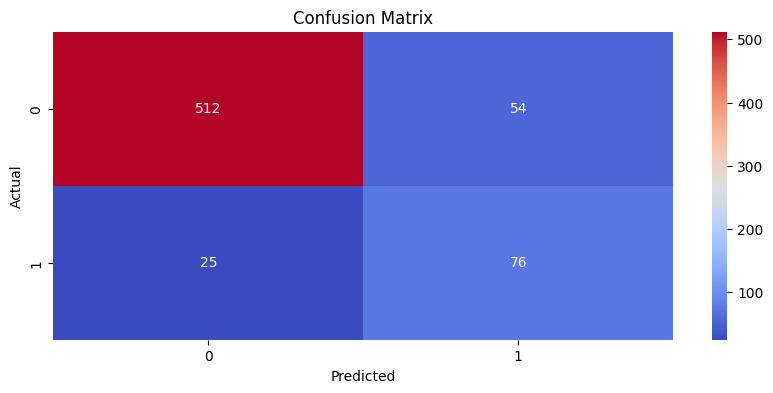

In [82]:
plot_confusion_matrix(y_test, y_hat_test)

nterpretation:


*  True Positives (TP): The model correctly predicted the positive class (78).
*   True Negatives (TN): The model correctly predicted the negative class (525).
*   False Positives (FP): The model incorrectly predicted the positive class when it was actually negative (41).
*  False Negatives (FN): The model incorrectly predicted the negative class when it was actually positive (23).








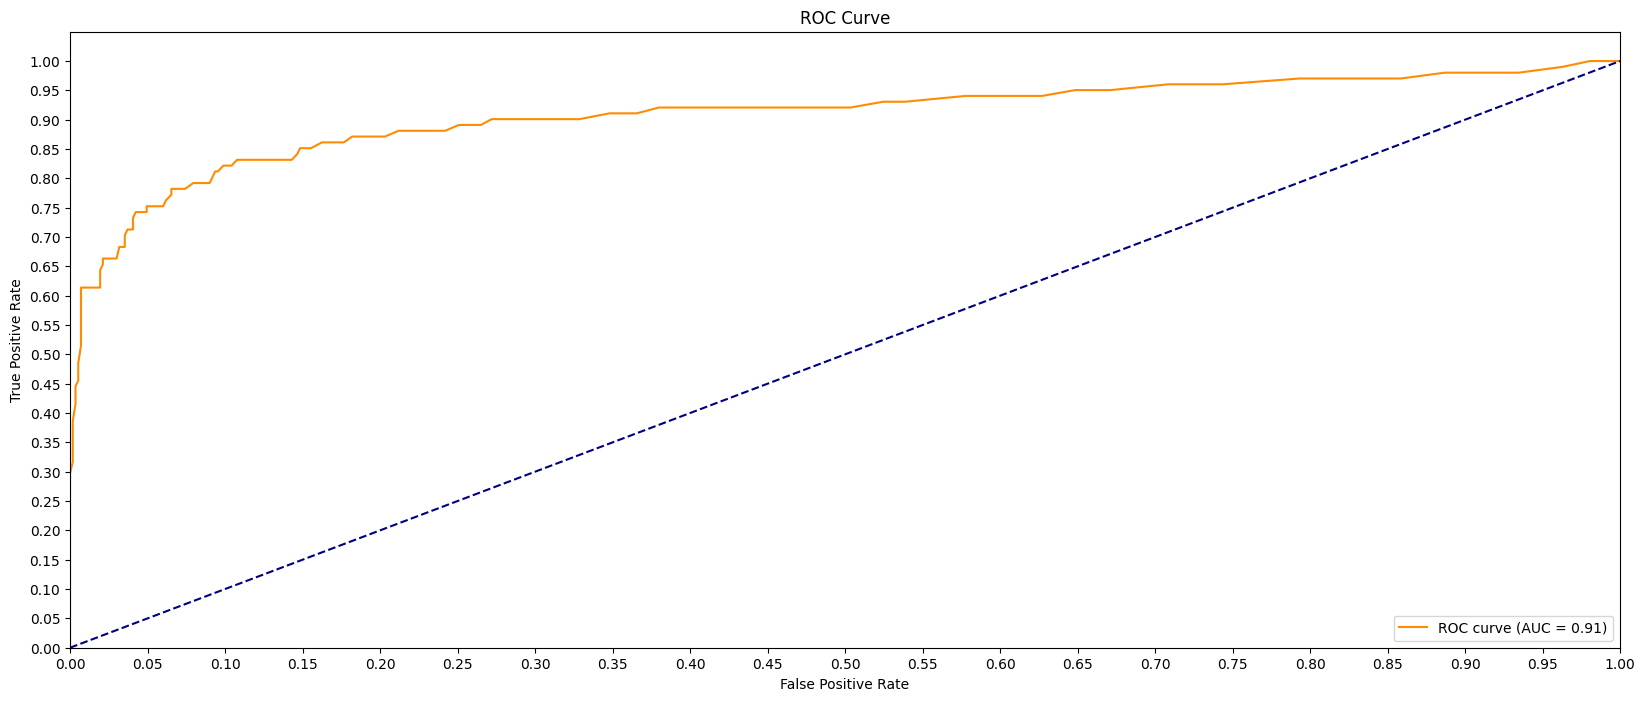

The AUC score is: 0.9082846447188888


In [83]:
plot_roc_curve(best_rf, X_test, y_test)

# Model Evaluation and Selection

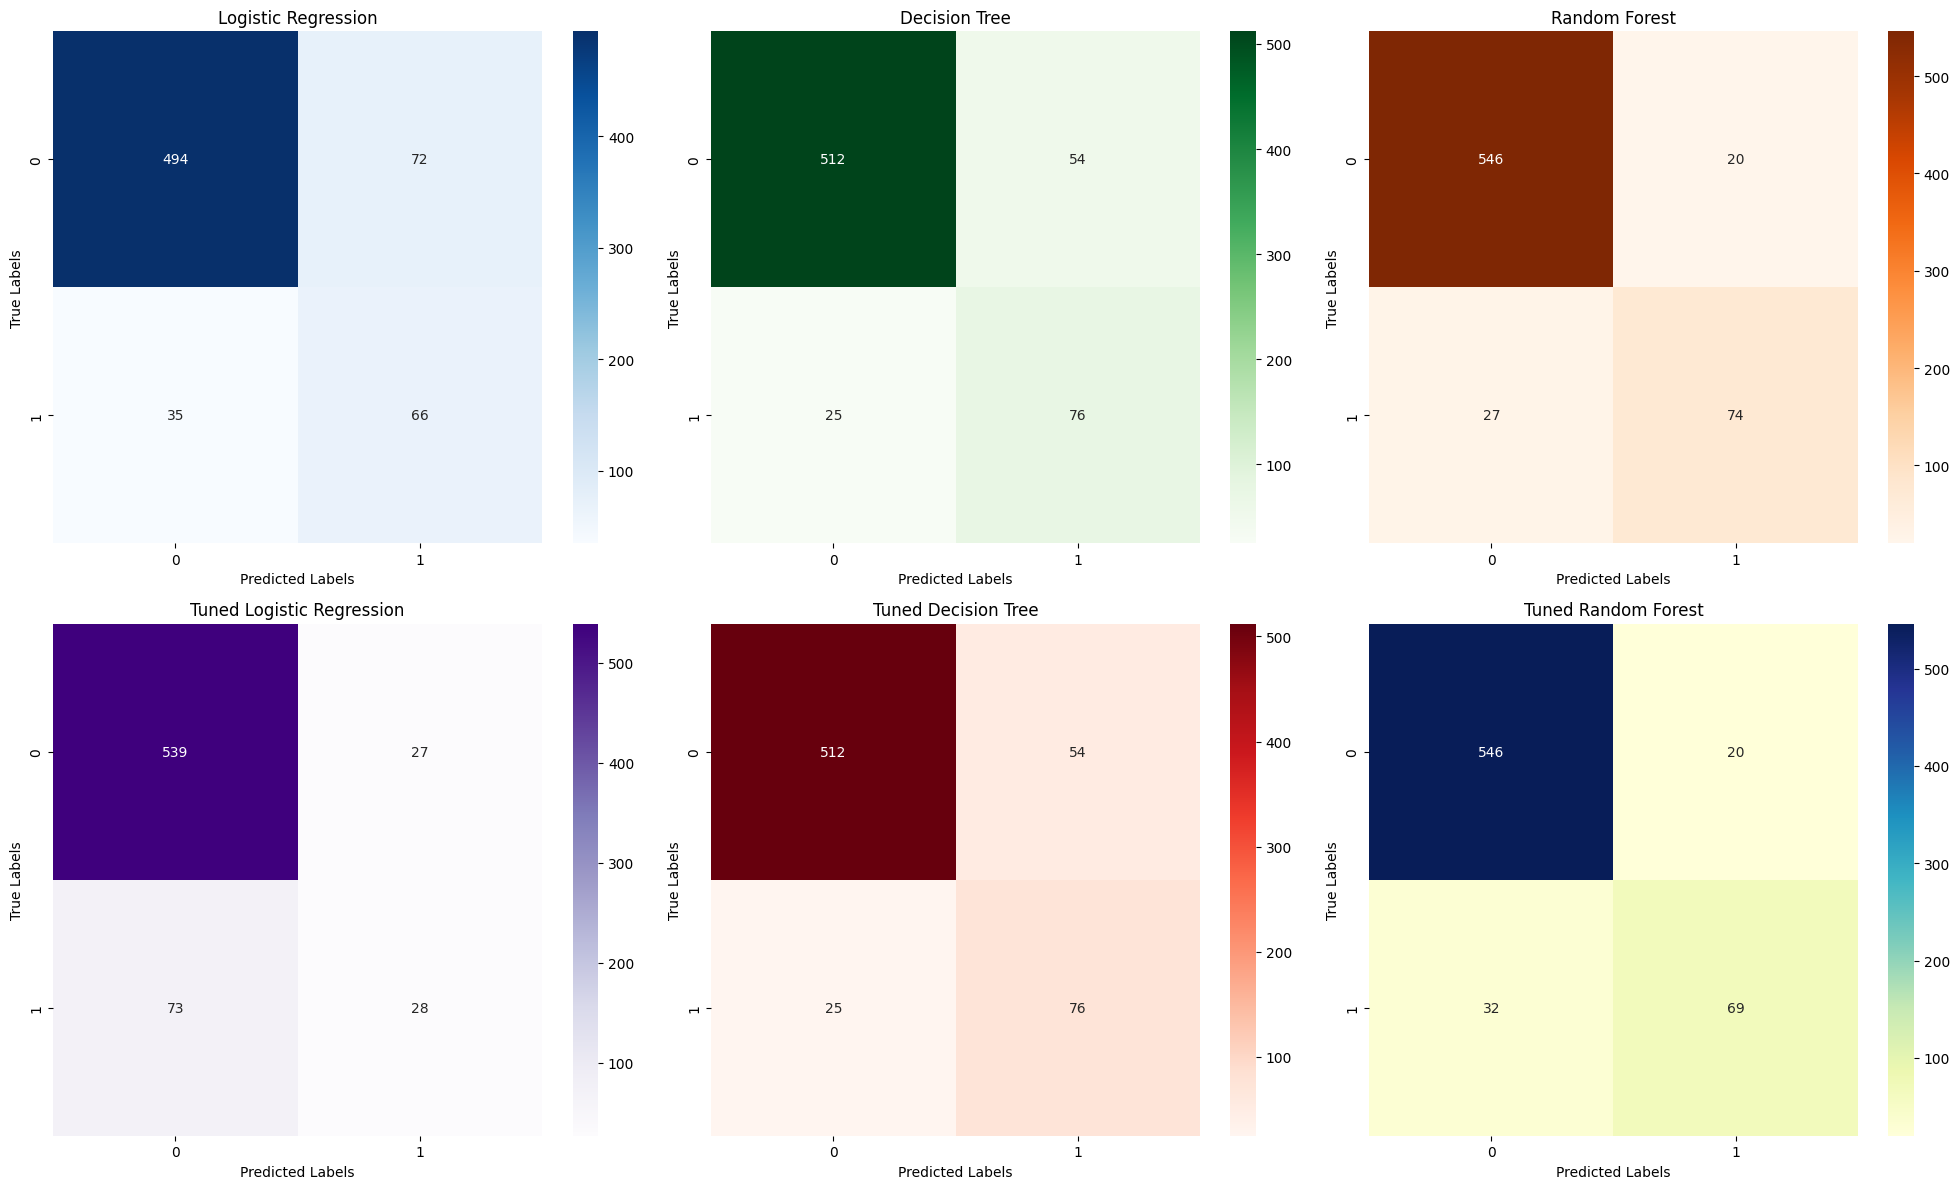

In [95]:
models = [lr, Dt, rf, best_lr, best_Dt, best_rf]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Tuned Logistic Regression', 'Tuned Decision Tree', 'Tuned Random Forest']

#Fit the base RandomForestClassifier model (rf)
rf.fit(X_train_resampled, y_train_resampled) # Add this line to fit the rf model

plot_confusion_matrices(models, X_test, y_test, model_names)

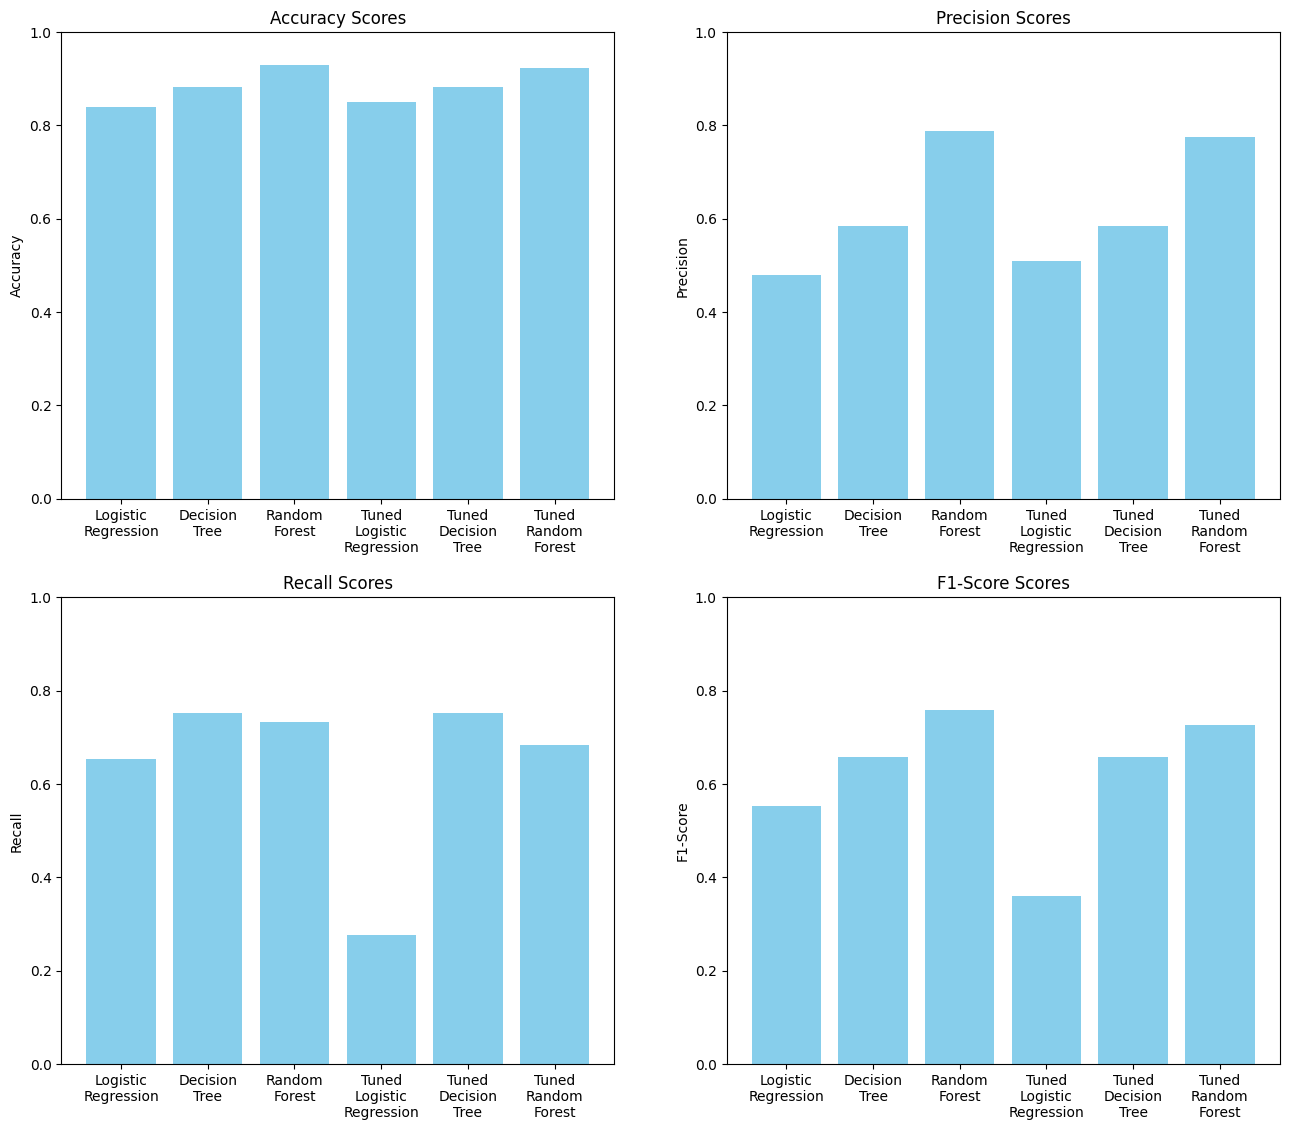

In [96]:
plot_evaluation_metrics(models, X_test, y_test, model_names)

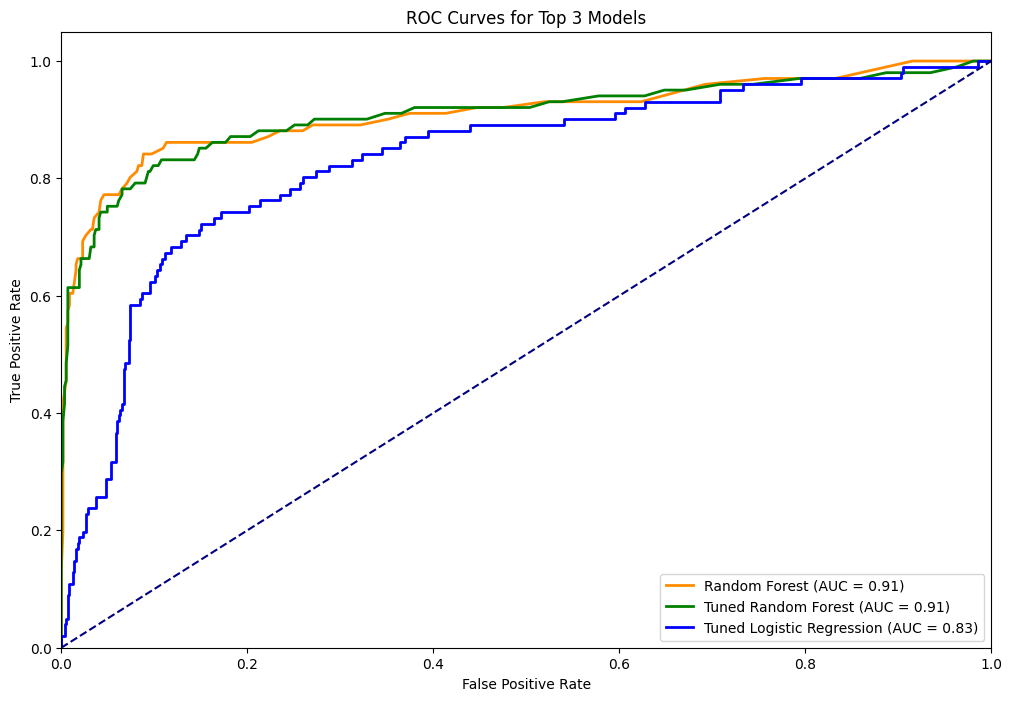

In [97]:
plot_roc_curves(models, X_test, y_test, model_names)

The tuned decision tree model offers a good balance between precision, recall, accuracy, and F1-score on the testing set, indicating that it generalizes better to new data compared to the other two models. While the tuned random forest model also performs well, the significant overfitting and slightly lower generalization performance makes it less desirable. The tuned logistic regression model is not recommended due to its poor recall and F1-score on the testing data.

# Feature Importance

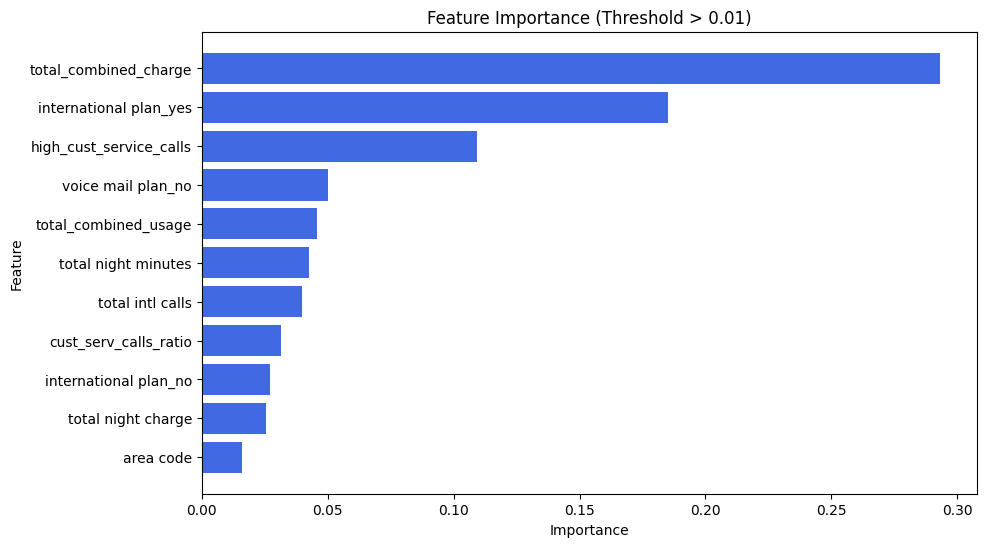

In [98]:
# Get the feature importance
importances = best_Dt.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Set a threshold for feature importance
threshold = 0.01

# Filter the DataFrame to include only features above the threshold
important_features_df = feature_importance_df[feature_importance_df['Importance'] > threshold]

# Sort the DataFrame by importance
important_features_df = important_features_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(important_features_df['Feature'], important_features_df['Importance'], color='royalblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Feature Importance (Threshold > {threshold})')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

**Important Features** :

**Total Combined Charge:**

This feature has the highest importance by a significant margin. The total amount charged to the customer across various plans (day, evening, international) is the most critical factor in predicting whether a customer will churn. This suggests that customers who incur higher charges are more likely to consider leaving SyriaTel, possibly due to dissatisfaction with the cost of services.

**International Plan (No):**

The second most important feature is whether the customer does not have an international plan. Customers who do not subscribe to an international plan are more likely to churn. This could indicate that such customers might not find the existing plans valuable or that they might be looking for more comprehensive offerings, including international services.

**High Customer Service Calls:**

This feature also ranks high in importance. Customers who make a large number of calls to customer service are more likely to churn. This suggests that frequent interactions with customer service, possibly due to unresolved issues or dissatisfaction, are strong indicators of potential churn.

**Total Combined Usag**e:

This feature also contributes significantly to the model. The total usage of services (day and evening calls) is another important predictor. Customers with high usage may churn if they feel they are not getting value for their money, or conversely, low usage could indicate that customers might not be fully engaged with the service.

# Conclusion

Cost-Related Factors: The biggest drivers of churn are cost-related, especially total charges. This highlights the importance of pricing and perceived value in SyriaTel’s customer retention efforts.

Service Dissatisfaction: Frequent customer service interactions, particularly high call volumes, suggest that unresolved issues or poor service experiences increase churn risk. Improving customer support could help retain more customers.

Plan Offerings: The availability of specific plans, such as international plans, significantly impacts churn. This suggests a need to reassess how these plans are marketed and whether they provide sufficient value to customers.


# Recommendation



* Focus retention efforts on customers with high total charges, as they are at the greatest risk of churn. Consider offering discounts, personalized plans, or loyalty rewards to increase perceived value.

* Improve Customer Service: Reduce churn by improving the customer service experience, ensuring that issues are resolved efficiently and that customers feel their concerns are being addressed.

* Given the importance of the international plan features, SyriaTel should consider re-evaluating these offerings to ensure they meet customer needs and are priced competitively.

